# SyriaTel Customer Churn Issues

This is project is an attempt to predict those customers that will be leaving the SyriaTel mobile network. I will be using predictive modeling techniques to perform this task. Customer churn is described on Hubspot as
> Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame

Also according to Hubspot:
>In fact, an increase in customer retention of just 5% can create at least a 25% increase in profit. This is because returning customers will likely spend 67% more on your company's products and services. 

Being able to detect who will leave a given service before they actually do is an invalueable insight for any company. Being able to target those customers preemptively with incenstivs, discounts, and other attention may help to slow churn rate. Specific targetting can help with being judicious with such enticements. Rather than offering everyone on a given service a price break, being able to diagnos with speicifc metrics will make the best use of rescources for customer retention. 

## Exploratory Data Analysis

Before specific and granular exploration of the dataset that I will be using for predictive modeling, I want to first take a look at the current churn rate of SyriaTel.

In [11]:
#The Many imports I will be using for this project
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from skippa import Skippa, columns


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [477]:
#Loading the initial dataframe
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")


In [403]:
#Taking a look at the entire dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Initially this dataset looks nice and clean. There are no null observations, though there is a mixture of objects and numeric features. The target for modeling is the "churn" feature. Which is where initial attention will be paid.

In [14]:
df.head(5)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

### Target Feature

In [15]:
df['churn'].value_counts()


False    2850
True      483
Name: churn, dtype: int64

The churn feature is a boolean, and what be best converted to binary values for modeling.

In [16]:
df['churn']=df['churn'].astype(int)


In [478]:
df['churn']=df['churn'].map({False:'Retained',True:'Churned'})

In [479]:
df['churn']

0       Retained
1       Retained
2       Retained
3       Retained
4       Retained
          ...   
3328    Retained
3329    Retained
3330    Retained
3331    Retained
3332    Retained
Name: churn, Length: 3333, dtype: object

In [18]:
plot_churn

0       Retained
1       Retained
2       Retained
3       Retained
4       Retained
          ...   
3328    Retained
3329    Retained
3330    Retained
3331    Retained
3332    Retained
Name: churn, Length: 3333, dtype: object

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


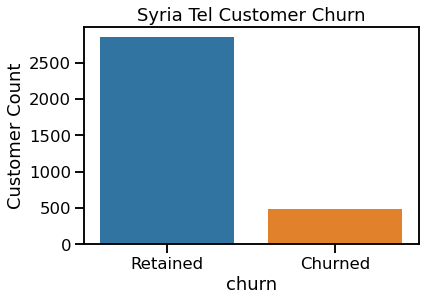

In [19]:
sns.set_context("talk")
ax = sns.countplot(plot_churn)
ax.set(
       ylabel='Customer Count',
       title='Syria Tel Customer Churn');

In [20]:
#Calculating churn by dividing the number of customers lost by the total customers.
np.sum(df['churn']==1)/len(df['churn'])

0.14491449144914492

### Customer Charges

In [21]:
charge_cols = [col for col in df.columns if 'charge' in col]

The dataset has features for different kinds of charges. I'm not sure if the day charge is encompassing for or includes the other charges.

In [409]:
#Totaling Charges for Evening, Night, and Internationl
display(df['total eve charge'].sum()+df['total night charge'].sum()+df['total intl charge'].sum())

#Summing Total Day Charge
display(df['total day charge'].sum())

96281.86000000002

101864.17000000001

Total Day charge appears to be a separate charge, so I will create a total charges column.

In [410]:
df.groupby('churn')[charge_cols].mean()

total day charge  total eve charge  total night charge  \
churn                                                           
False         29.780421         16.918909            9.006074   
True          35.175921         18.054969            9.235528   

       total intl charge  
churn                     
False           2.743404  
True            2.889545

In [482]:
#Summing all the charge columns
df['total_charge']=df[charge_cols].sum(axis=1)

In [416]:
#Average Charge per Customer
df.groupby('churn')['total_charge'].mean()

churn
False    58.448807
True     65.355963
Name: total_charge, dtype: float64

The total charge per customer churn for not churn is over 5% higher for churned vs. non-churned customers. This will be important to bear in mind later.

[Text(0.5, 1.0, 'Average Charge Retained vs Churned')]

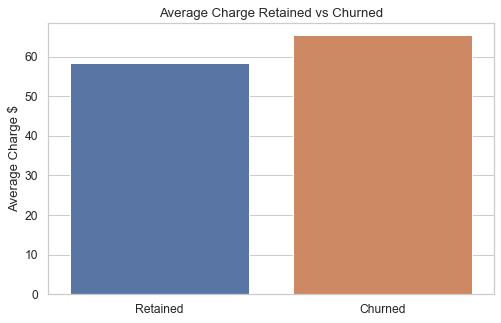

In [445]:
g = sns.barplot(data=df,x='churn',y='total_charge',ci=None)
g.set(xticklabels=["Retained",'Churned'])
g.set(ylabel='Average Charge $')
g.set(xlabel='')
g.set(title='Average Charge Retained vs Churned')

In [446]:
df['total_charge'].mean()

59.44975397539754

In [418]:
df.groupby('international plan')['total_charge'].mean()

international plan
no     59.283216
yes    61.001703
Name: total_charge, dtype: float64

International plan customers rack up slightly higher charges as well.

In [472]:
df['churn']

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: churn, Length: 3333, dtype: bool

[Text(0.5, 1.0, 'Average Charge International Customer Comparison')]

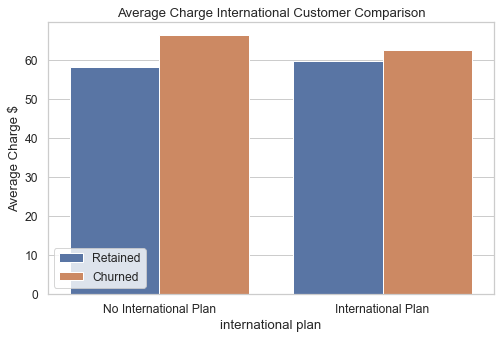

In [492]:
labels=['Retained','Churned']
g = sns.barplot(data=df,x='international plan',y='total_charge',hue='churn',ci=False)
g.set(xticklabels=['No International Plan','International Plan'])
g.set(ylabel='Average Charge $')
g.legend(title='')
g.set(title='Average Charge International Customer Comparison')

In [490]:
df.groupby(['international plan','churn'])['total_charge'].mean()

international plan  churn   
no                  Churned     66.428064
                    Retained    58.355244
yes                 Churned     62.648321
                    Retained    59.788871
Name: total_charge, dtype: float64

Doing a double groupby, the non-international plan customers show a higher charge than the international plan customers.

In [426]:
international_comparison = df.groupby('international plan')['churn'].mean()

In [427]:
df.groupby('voice mail plan')['total_charge'].mean()

voice mail plan
no     59.394007
yes    59.595531
Name: total_charge, dtype: float64

In [30]:
df.groupby(['churn','voice mail plan'])['total_charge'].mean()

churn  voice mail plan
0      no                 57.942211
       yes                59.656936
1      no                 66.627767
       yes                58.949250
Name: total_charge, dtype: float64

The voice mail plan seems to show a different relationship, but in the churn group the non-voicemail plan customers have a higher total charge, but in the non-churned group the charge is higher for churned customers.

In [31]:
df['churn'].mean()

0.14491449144914492

In [32]:
df.groupby('international plan')['churn'].mean()

international plan
no     0.114950
yes    0.424149
Name: churn, dtype: float64

The current churn rate for the period of this data set is 14.5%. Being able to reduce this figure using a targeted approach. It's also important to remember that we are dealing with an unbalanced dataset and the models used will need to be weighted to deal with this issue.

### Feature Exploration

Several of the features in this dataset are objects. I will start by looking at the state feature.

In [33]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
VA     77
WY     77
CT     74
MI     73
VT     73
ID     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
NV     66
CO     66
WA     66
MA     65
RI     65
MS     65
AZ     64
MO     63
FL     63
NM     62
ND     62
ME     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

Though this is a dataset for a Syrian telecom, the user base is located in the United States, with a higher number of users in West Virgina and the lowest number being in California. State may or may not be an important feature in the dataset and I will consider dropping it for modeling.

In [34]:
df.groupby('state')['churn'].mean()

state
AK    0.057692
AL    0.100000
AR    0.200000
AZ    0.062500
CA    0.264706
CO    0.136364
CT    0.162162
DC    0.092593
DE    0.147541
FL    0.126984
GA    0.148148
HI    0.056604
IA    0.068182
ID    0.123288
IL    0.086207
IN    0.126761
KS    0.185714
KY    0.135593
LA    0.078431
MA    0.169231
MD    0.242857
ME    0.209677
MI    0.219178
MN    0.178571
MO    0.111111
MS    0.215385
MT    0.205882
NC    0.161765
ND    0.096774
NE    0.081967
NH    0.160714
NJ    0.264706
NM    0.096774
NV    0.212121
NY    0.180723
OH    0.128205
OK    0.147541
OR    0.141026
PA    0.177778
RI    0.092308
SC    0.233333
SD    0.133333
TN    0.094340
TX    0.250000
UT    0.138889
VA    0.064935
VT    0.109589
WA    0.212121
WI    0.089744
WV    0.094340
WY    0.116883
Name: churn, dtype: float64

In [35]:
df['international plan'].value_counts()


no     3010
yes     323
Name: international plan, dtype: int64

In [36]:
df.groupby('international plan')['churn'].describe()

count      mean       std  min  25%  50%  75%  max
international plan                                                     
no                  3010.0  0.114950  0.319015  0.0  0.0  0.0  0.0  1.0
yes                  323.0  0.424149  0.494980  0.0  0.0  0.0  1.0  1.0

In [37]:
df.groupby('churn')['international plan'].describe()

count unique top  freq
churn                       
0      2850      2  no  2664
1       483      2  no   346

In [38]:
df.groupby(['international plan'])[['total intl charge','total intl calls']].mean()

total intl charge  total intl calls
international plan                                     
no                           2.753279          4.465449
yes                          2.869907          4.609907

In [39]:
df['voice mail plan'].value_counts()


no     2411
yes     922
Name: voice mail plan, dtype: int64

In [40]:
df['phone number']

0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: phone number, Length: 3333, dtype: object

In [41]:
df['phone number'].nunique()


3333

The other object features are above should be converted to numeric with one-hot-encoding during preprocessing. I will probably drop the phone number column as a model should generalize, and a phone number is the most granular data in the set. I will always consider dropping the state column as any information in state would be learned in the area code feature and I want to reduce dimensionality in modeling.

In [42]:
df['area code'].value_counts()


415    1655
510     840
408     838
Name: area code, dtype: int64

In [43]:
df['area code'].nunique()


3

In [44]:
df.groupby('area code')['total_charge'].mean()

area code
408    58.929105
415    59.811958
510    59.255536
Name: total_charge, dtype: float64

Area code shows little difference in the total charges

In [45]:
df.groupby('area code')['churn'].mean()

area code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64

The area code doesn't show differences between the values, so I will probably drop that for the dataset as well for the training data.

Curiously there are 50 unique values in the state column, but only 3 area codes in the entire dataset. It seems like something is amiss, and my inclination will be to remove those features if they do not prove useful.

### Numeric Features

In [46]:
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls        churn  total_charge  
count        3333.000000             3333.000000  3333.000000   3333.000000  
mean            2.764581                1.562856     0.144914     59.449754  
std             0.753773                1.315491     0.352067     10.502261  
min             0.000000                0.000000     0.000000     22.930000  
25%             2.300000                1.000000     0.000000     52.380000  
50%             2.780000                1.000000     0.000000     59.470000  
75%             3.270000                2.000000     0.000000     66.480000  
max             5.400000                9.000000     1.000000     96.150000

Taking a look at some of the statistics for the numeric columns, the maximum length of an account is 243, which is likely days of an account. That does seem short, but this could be for a short period for the sample. I do expect to see significant multicollineartiy in this dataset, which will not be an issue for binary modeling, it could make interpretation of features more difficult and make an unnecessarily more complicate model.

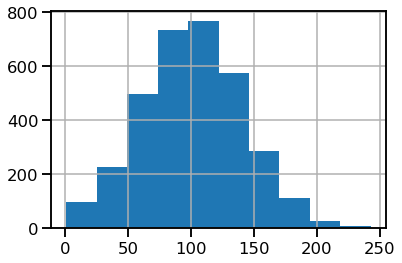

In [47]:
df['account length'].hist();


In [383]:
numerics = df.select_dtypes(exclude=['object','bool'])

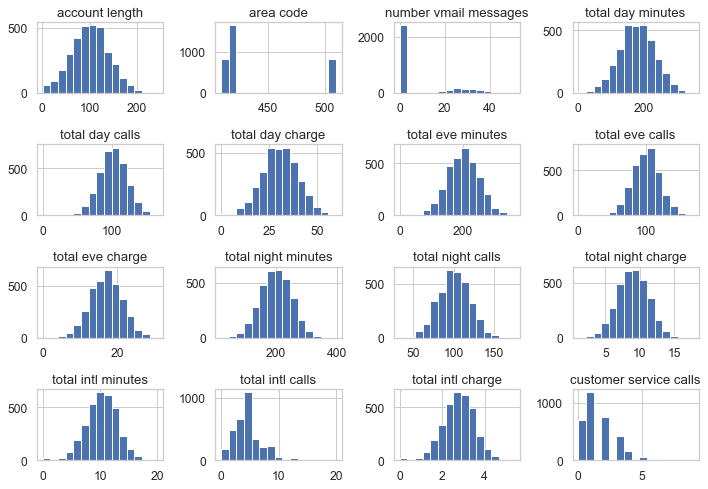

In [402]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

numerics.hist(bins=15, figsize=(10, 7),layout=(4,4))


plt.tight_layout()
plt.show()

Looking at the histogram for the account length, it appears there is normal distribution of account length.

In [48]:
df.corr()

account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.007663   
total intl minutes            0.009514  -0.018288               0.002856   
total intl calls              0.020661  -0.024179               0.013957   
total intl charge             0.009546  -0.018395               0.002884   
customer service calls       -0.003796   0.027572              -0.013263   
churn                         0.016541   0.006174              -0.089728   
total_charge                  0.001454  -0.008393               0.009766   

                        total day minutes  total day calls  total day charge  \
account length                   0.006216         0.038470          0.006214   
area code                       -0.008264        -0.009646         -0.008264   
number vmail messages            0.000778        -0.009548          0.000776   
total day minutes                1.000000         0.006750          1.000000   
total day calls                  0.006750         1.000000          0.006753   
total day charge                 1.000000         0.006753          1.000000   
total eve minutes                0.007043        -0.021451          0.007050   
total eve calls                  0.015769         0.006462          0.015769   
total eve charge                 0.007029        -0.021449          0.007036   
total night minutes              0.004323         0.022938          0.004324   
total night calls                0.022972        -0.019557          0.022972   
total night charge               0.004300         0.022927          0.004301   
total intl minutes              -0.010155         0.021565         -0.010157   
total intl calls                 0.008033         0.004574          0.008032   
total intl charge               -0.010092         0.021666         -0.010094   
customer service calls          -0.013423        -0.018942         -0.013427   
churn                            0.205151         0.018459          0.205151   
total_charge                     0.884754         0.003673          0.884757   

                        total eve minutes  total eve calls  total eve charge  \
account length                  -0.006757         0.019260         -0.006745   
area code                        0.003580        -0.011886          0.003607   
number vmail messages            0.017562        -0.005864          0.017578   
total day minutes                0.007043         0.015769          0.007029   
total day calls                 -0.021451         0.006462         -0.021449   
total day charge                 0.007050         0.015769          0.007036   
total eve minutes                1.000000        -0.011430          1.000000   
total eve calls                 -0.011430         1.000000         -0.011423   
total eve charge                 1.000000        -0.011423          1.000000   
total night minutes             -0.012584        -0.002093         -0.012592   
total night calls                0.007586         0.007710          0.007596   
total night charge              -0.012593        -0.002056         -0.012601   
total intl minutes

In [49]:
mask = np.triu(np.ones_like(df.corr()))

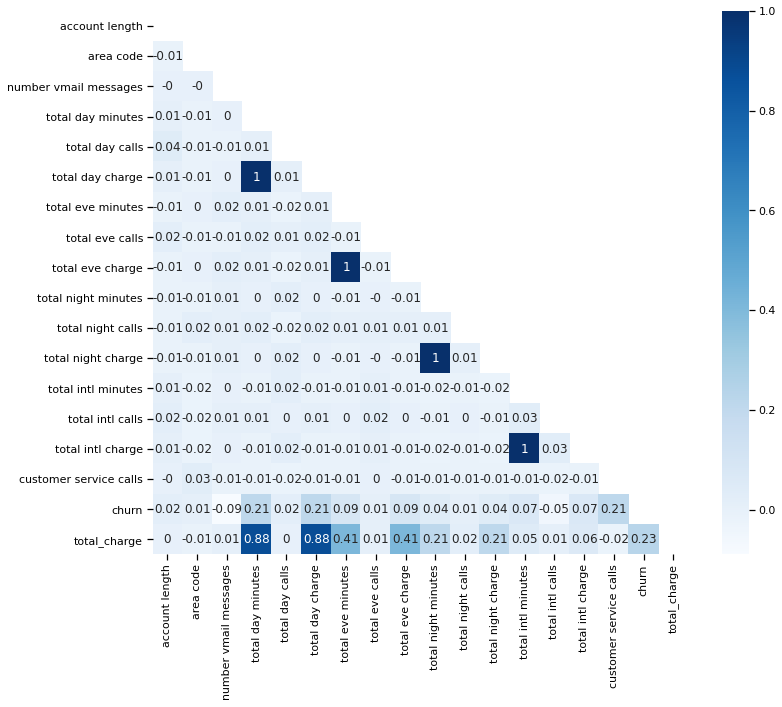

In [50]:
sns.set_context("notebook")
f, ax = plt.subplots(figsize=(12,10))
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True,cmap='Blues',mask=mask)
plt.show()

The Correlation matrix reveals that churn slightly correlates with customer service calls and total minutes. There are also some 1 to 1 correlations with international minutes, total night minutes, total eve minutes, and total day calls. I will. dropping some of these columns in an effort to reduce dimensionality as well.

In [51]:
df

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve charge  \
0                 110             45.07  ...             16.78   
1                 123             27.47  ...             16.62   
2                 114             41.38  ...             10.30   
3                  71             50.90  ...              5.26   
4                 113             28.34  ...             12.61   
...               ...               ...  ...               ...   
3328               77             26.55  ...             18.32   
3329               57             39.29  ...             13.04   
3330              109             30.74  ...             24.55   
3331              105             36.35  ...             13.57   
3332              113             39.85  ...             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6               2.67   
3329                 9.6                 4               2.59   
3330                14.1                 6               3.81   
3331                 5.0                10               1.35   
3332      

<AxesSubplot:xlabel='international plan', ylabel='churn'>

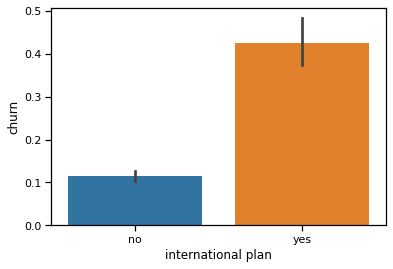

In [52]:
sns.barplot(data=df,x='international plan',y='churn')

### Customer Service Calls

In [53]:
#Value Counts for Customer Service Calls
df['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

In [54]:
df.groupby('customer service calls')['churn'].mean()

customer service calls
0    0.131994
1    0.103302
2    0.114625
3    0.102564
4    0.457831
5    0.606061
6    0.636364
7    0.555556
8    0.500000
9    1.000000
Name: churn, dtype: float64

Looking at the number of customer service calls and the percentage of churn customers, it looks like it's a good indicator of churn, but it is certainly a skewed distribution. Four or more calls looks like the point at which we see a high churn rate.  

In [55]:
df['Frequent Customer Service'] = np.where(df['customer service calls']>3, True, False)

In [ ]:
df['Frequent Customer Service']=df['Frequent Customer Service'].astype(int)

In [ ]:
df.groupby(['Frequent Customer Service'])['churn'].describe()

There are several collinearities, they do not make a difference for classifcation per se, but may be hidnerance with explanation of features. 

<AxesSubplot:>

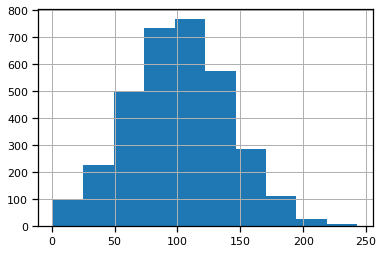

In [56]:
df['account length'].hist()

In [57]:
df.groupby('churn').mean()['account length']

churn
0    100.793684
1    102.664596
Name: account length, dtype: float64

The dataset appears to be new acounts, with the maximum being around 215 days old

### Average Charge Per Customer

In [58]:
df['total_charge'].mean()

59.44975397539754

In [59]:
df['total_charge'].describe()

count    3333.000000
mean       59.449754
std        10.502261
min        22.930000
25%        52.380000
50%        59.470000
75%        66.480000
max        96.150000
Name: total_charge, dtype: float64

In [60]:
pd.crosstab([df['international plan'],df['voice mail plan']],df['churn'],df['total_charge'],aggfunc='mean')

churn                                       0          1
international plan voice mail plan                      
no                 no               57.843562  67.945464
                   yes              59.577812  56.013182
yes                no               59.367308  62.687723
                   yes              60.767500  62.537778

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      3333 non-null   object 
 1   account length             3333 non-null   int64  
 2   area code                  3333 non-null   int64  
 3   phone number               3333 non-null   object 
 4   international plan         3333 non-null   object 
 5   voice mail plan            3333 non-null   object 
 6   number vmail messages      3333 non-null   int64  
 7   total day minutes          3333 non-null   float64
 8   total day calls            3333 non-null   int64  
 9   total day charge           3333 non-null   float64
 10  total eve minutes          3333 non-null   float64
 11  total eve calls            3333 non-null   int64  
 12  total eve charge           3333 non-null   float64
 13  total night minutes        3333 non-null   float

In [62]:
df.groupby(['international plan'])['total_charge'].mean()

international plan
no     59.283216
yes    61.001703
Name: total_charge, dtype: float64

In [63]:
df.groupby('voice mail plan')['total_charge'].mean()

voice mail plan
no     59.394007
yes    59.595531
Name: total_charge, dtype: float64

In [64]:
df.groupby('customer service calls')['total_charge'].mean()

customer service calls
0    59.904304
1    59.461770
2    58.894242
3    59.836573
4    60.223373
5    58.146970
6    54.236364
7    56.844444
8    58.700000
9    70.390000
Name: total_charge, dtype: float64

In [65]:
df['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

## Feature Engineering

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      3333 non-null   object 
 1   account length             3333 non-null   int64  
 2   area code                  3333 non-null   int64  
 3   phone number               3333 non-null   object 
 4   international plan         3333 non-null   object 
 5   voice mail plan            3333 non-null   object 
 6   number vmail messages      3333 non-null   int64  
 7   total day minutes          3333 non-null   float64
 8   total day calls            3333 non-null   int64  
 9   total day charge           3333 non-null   float64
 10  total eve minutes          3333 non-null   float64
 11  total eve calls            3333 non-null   int64  
 12  total eve charge           3333 non-null   float64
 13  total night minutes        3333 non-null   float

All of the minutes correlate with the charges, I'm going to put them all together, see if that changes the correlation. 

In [67]:
df['total minutes']=df['total eve minutes']+df['total night minutes']+df['total intl minutes']+df['total day minutes']

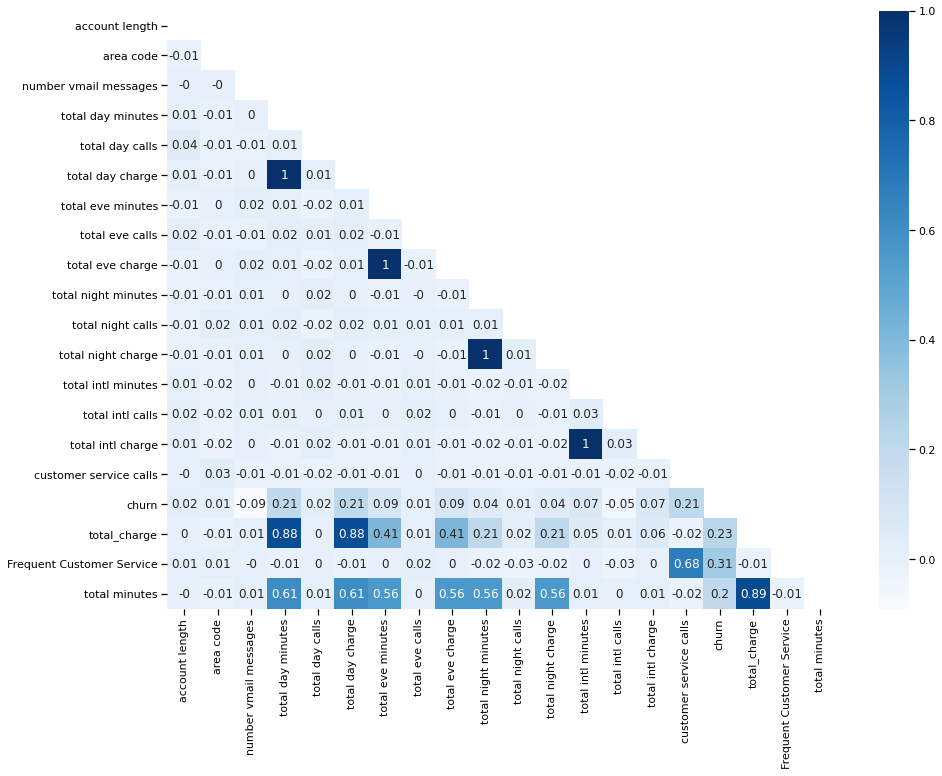

In [68]:
sns.set_context("notebook")
mask = np.triu(np.ones_like(df.corr()))
f, ax = plt.subplots(figsize=(15,11))
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True,mask=mask,cmap='Blues')
plt.show()

The correlation in the model is reduced and hopefully this will help with later interpretation. The only other oppurtunities I see for feature engineering are perhaps binning customer service calls.

## Preprocessing Steps

In [69]:
#Changing area code to an object instead of a numeric
df['area code']=df['area code'].astype('str')

In [70]:
#Dropping the target Churn from the trainging set
X = df.drop('churn',axis=1)
#Cresting the target variable for modelling
y = df['churn'].astype(int)

In [71]:
#Dropping 'phoe number from the training set'
X = X.drop(['phone number'],axis=1)

In [72]:
#Seperating Categorical and Numeric Columns
categories = X.select_dtypes(include='object')
numerics = X.select_dtypes(exclude='object')

In [369]:
df[numerical].hist()

NameError: name 'numerical' is not defined

### Train Test Split

In [73]:
#Splitting Data into Train Test Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=86)

In [74]:
X_train.head(5)

state  account length area code international plan voice mail plan  \
757     UT             112       415                 no              no   
1939    AZ             113       510                 no              no   
2871    NC             125       408                 no              no   
1714    NE              99       415                 no              no   
2264    GA              18       408                 no              no   

      number vmail messages  total day minutes  total day calls  \
757                       0              115.8              108   
1939                      0              128.7              100   
2871                      0              212.3               89   
1714                      0              200.0               66   
2264                      0              197.0               97   

      total day charge  total eve minutes  ...  total night minutes  \
757              19.69              243.3  ...                184.6   
1939             21.88              227.1  ...                178.1   
2871             36.09              215.4  ...                186.8   
1714             34.00              107.9  ...                233.7   
2264             33.49              203.7  ...                202.0   

      total night calls  total night charge  total intl minutes  \
757                  78                8.31                13.1   
1939                135                8.01                 9.2   
2871                 73                8.41                11.3   
1714                 82               10.52                11.4   
2264                105                9.09                 8.7   

      total intl calls  total intl charge  customer service calls  \
757                  5               3.54                       1   
1939                 4               2.48                       2   
2871                 2               3.05                       2   
1714                 2               3.08                       3   
2264                 3               2.35                       3   

      total_charge  Frequent Customer Service  total minutes  
757          52.22                      False          556.8  
1939         51.67                      False          543.1  
2871         65.86                      False          625.8  
1714         56.77                      False          553.0  
2264         62.24                      False          611.4  

[5 rows x 22 columns]

In [75]:
y_train.head(5)


757     0
1939    1
2871    0
1714    0
2264    0
Name: churn, dtype: int64

### Preprocessing Pipeline with Skippa

I've imported a new Pipeline I found that has the that preserves the dataframe format. 

In [322]:
Preprocessed = (
    Skippa()
    #Standard Scalar for Continuous Variables
    .scale(columns(dtype_include='number'), type='standard')
    #One Hot Encoding Objects
    .onehot(columns(dtype_exclude='number'),drop='if_binary')
    .build())

In [77]:
# Processed_X_train = Preprocessed.fit_transform(X_train)
Processed_X_train = Preprocessed.fit_transform(X_train)


In [78]:
X_train

state  account length area code international plan voice mail plan  \
757     UT             112       415                 no              no   
1939    AZ             113       510                 no              no   
2871    NC             125       408                 no              no   
1714    NE              99       415                 no              no   
2264    GA              18       408                 no              no   
...    ...             ...       ...                ...             ...   
1001    TN             140       415                 no              no   
2075    ID              73       510                 no             yes   
1123    VA              11       408                 no             yes   
1888    WA             117       408                 no              no   
3220    WI             184       408                 no             yes   

      number vmail messages  total day minutes  total day calls  \
757                       0              115.8              108   
1939                      0              128.7              100   
2871                      0              212.3               89   
1714                      0              200.0               66   
2264                      0              197.0               97   
...                     ...                ...              ...   
1001                      0              125.3               84   
2075                     28              198.2              107   
1123                     24              131.5               98   
1888                      0              191.1               93   
3220                     12              200.3               76   

      total day charge  total eve minutes  ...  total night minutes  \
757              19.69              243.3  ...                184.6   
1939             21.88              227.1  ...                178.1   
2871             36.09              215.4  ...                186.8   
1714             34.00              107.9  ...                233.7   
2264             33.49              203.7  ...                202.0   
...                ...                ...  ...                  ...   
1001             21.30              167.6  ...                260.6   
2075             33.69              139.1  ...                199.1   
1123             22.36              230.2  ...                283.7   
1888             32.49              282.8  ...                 84.8   
3220             34.05              253.6  ...                149.3   

      total night calls  total night charge  total intl minutes  \
757                  78                8.31                13.1   
1939                135                8.01                 9.2   
2871                 73                8.41                11.3   
1714                 82               10.52                11.4   
2264                105                9.09                 8.7   
...                 ...                 ...                 ...   
1001                 94               11.73                 8.4   
2075                139                8.96                 8.8   
1123                 87               12.77                10.0   
1888                118                3.82                12.0   
3220                 93                6.72                10.2   

      total intl calls  total intl charge  customer service calls  \
757                  5               3.54                       1   
1939                 4               2.48                       2   
2871                 2               3.05                       2   
1714                 2               3.08                       3   
2264                 3               2.35                       3   
...                ...                ...                     ...   
1001                 4               2.27                       1   
2075                 1               2.38                       2   
1123                

In [79]:
Processed_X_train


account length  number vmail messages  total day minutes  \
757         0.281724              -0.596248          -1.180613   
1939        0.306742              -0.596248          -0.943008   
2871        0.606963              -0.596248           0.596825   
1714       -0.043515              -0.596248           0.370271   
2264       -2.070002              -0.596248           0.315013   
...              ...                    ...                ...   
1001        0.982238              -0.596248          -1.005632   
2075       -0.693992               1.449378           0.337116   
1123       -2.245130               1.157145          -0.891434   
1888        0.406816              -0.596248           0.206341   
3220        2.083046               0.280449           0.375796   

      total day calls  total day charge  total eve minutes  total eve calls  \
757          0.388915         -1.180244           0.828953         0.529854   
1939        -0.013471         -0.942962           0.506416        -1.692709   
2871        -0.566751          0.596659           0.273473         1.338059   
1714        -1.723611          0.370212          -1.866819         0.176264   
2264        -0.164365          0.314955           0.040530         0.327803   
...               ...               ...                ...              ...   
1001        -0.818243         -1.005804          -0.678210         1.034982   
2075         0.338617          0.336625          -1.245637         1.136007   
1123        -0.114067         -0.890956           0.568136         0.529854   
1888        -0.365558          0.206607           1.615386        -2.248350   
3220        -1.220629          0.375630           1.034023         0.226777   

      total eve charge  total night minutes  total night calls  ...  state_WA  \
757           0.828791            -0.309309          -1.125629  ...       0.0   
1939          0.505550            -0.436206           1.765779  ...       0.0   
2871          0.273661            -0.266359          -1.379261  ...       0.0   
1714         -1.867221             0.649249          -0.922723  ...       0.0   
2264          0.039428             0.030384           0.243986  ...       0.0   
...                ...                  ...                ...  ...       ...   
1001         -0.677322             1.174406          -0.314006  ...       0.0   
2075         -1.246506            -0.026232           1.968685  ...       0.0   
1123          0.568793             1.625377          -0.669091  ...       0.0   
1888          1.615811            -2.257661           0.903430  ...       1.0   
3220          1.034915            -0.998455          -0.364732  ...       0.0   

      state_WI  state_WV  state_WY  area code_408  area code_415  \
757        0.0       0.0       0.0            0.0            1.0   
1939       0.0       0.0       0.0            0.0            0.0   
2871       0.0       0.0       0.0            1.0            0.0   
1714       0.0       0.0       0.0            0.0            1.0   
2264       0.0       0.0       0.0            1.0            0.0   
...        ...       ...       ...            ...            ...   
1001       0.0       0.0       0.0            0.0            1.0   
2075       0.0       0.0       0.0            0.0            0.0   
1123       0.0       0.0       0.0            1.0            0.0   
1888       0.0       0.0       0.0            1.0            0.0   
3220       1.0       0.0       0.0            1.0            0.0   

      area code_510  international plan_yes  voice mail plan_yes  \
757             0.0                     0.0                  0.0   
1939            1.0                     0.0                  0.0   
2871            0.0                     0.0                  0.0   
1714            0.0                     0.0                  0.0   
2264            0.0                     0.0                  0.0   
...             ...                     ...                  ...  

In [80]:
display(X_train.shape,
y_train.shape)

(2666, 22)

(2666,)

## Model Scoring

It will be important to keep track of my models as I got forward as there will be multiple models with different tuned parameters. I will make a couple of helper functions in order to put scores into a dataframe to make my final selections. I will be optimizing my models for recall score, but I do not want to overaly correct. I will keep track of other relevent metrics.

### Helper Functions

In [81]:
def score_report(model_name,model,X,Y):
    #return a dictionary of of model scores
    #creating a dictionary
    model_dict={}
    
    #Getting Predictions for training data
    preds = model.predict(X)
    
    #creating key/values of different metrics
    model_dict['model_name']=model_name
    model_dict['accuracy']=accuracy_score(Y,preds)
    model_dict['precision']=precision_score(Y,preds)
    model_dict['recall']=recall_score(Y,preds)
    model_dict['f1']=f1_score(Y,preds)
        
    return model_dict

    

In [82]:
def cross_val_report(model_name,model,X,Y):
    #creating a function to return the cross-val scores of the different mretrics
    model_dict={}
    
    model_dict['model_name']=model_name
    
    model_dict['mean_accuracy']=np.mean(cross_val_score(model,X,Y,scoring='accuracy'))
    model_dict['std_accuracy']=np.std(cross_val_score(model,X,Y,scoring='accuracy'))
    model_dict['mean_precision']=np.mean(cross_val_score(model,X,Y,scoring='precision'))
    model_dict['std_precision']=np.std(cross_val_score(model,X,Y,scoring='precision'))
    model_dict['mean_recall']=np.mean(cross_val_score(model,X,Y,scoring='recall'))
    model_dict['std_recall']=np.std(cross_val_score(model,X,Y,scoring='recall'))
    model_dict['mean_f1']=np.mean(cross_val_score(model,X,Y,scoring='f1'))
    model_dict['std_f1']=np.std(cross_val_score(model,X,Y,scoring='f1'))
    
    return model_dict

In [83]:
def append_df(dictionary,df):
    new_df = df.append(dictionary,ignore_index=True)
    return new_df

### Beta 2 Scoring

The focus of this project is to help attain the best Recall score without sacrificing Precision - being able to identify as many Churn customers as possible without letting in too many false postive Churn customers, I have decided the downside of false postives isn't terribly problematic. A beta 2 scorer will prioritize recall above precision. 

In [84]:
#Initialize Beta 2 Scorer
two_scorer = make_scorer(fbeta_score, beta=2)


## Logistic Regression

### Baseline Model

I will first make a baseline Logistic Regression Model to get a handle on this classification issue.

In [85]:
Logistic_Pipeline = (
    Skippa()
    .scale(columns(dtype_include='number'), type='standard')
    .onehot(columns(dtype_exclude='number'),drop='if_binary')
    .model(LogisticRegression(max_iter=1000)))

In [86]:
Logistic_Pipeline.fit(X_train,y_train)

SkippaPipeline(steps=[('scale_standard_0',
                       SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f876de3d340>,
                                            copy=True, with_mean=True,
                                            with_std=True)),
                      ('onehot_1',
                       SkippaOneHotEncoder(categories='auto',
                                           cols=<skippa.transformers.base.ColumnSelector object at 0x7f876de3d460>,
                                           drop='if_binary',
                                           dtype=<class 'numpy.float64'>,
                                           handle_unknown='error',
                                           sparse=False)),
                      ('model_2', LogisticRegression(max_iter=1000))])

In [87]:
Logistic_Baseline = score_report('LogisticBaseline',Logistic_Pipeline,X_train,y_train)


In [88]:
#Initializing a DataFrame for Model Sore Storage
models_df = pd.DataFrame(Logistic_Baseline,index=[0])


In [89]:
models_df

model_name  accuracy  precision    recall        f1
0  LogisticBaseline   0.86009   0.559783  0.260759  0.355786

### Logistic Regression Grid Search

In [90]:
param_grid = {'model_2__class_weight': ['none','balanced'],'model_2__C':[.01,.1,1,5,10,100]}


In [91]:
LG_GS = GridSearchCV(estimator=Logistic_Pipeline,cv=4,param_grid=param_grid,scoring=two_scorer,refit=True)
LG_GS.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=SkippaPipeline(steps=[('scale_standard_0',
                                              SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f876de3d340>,
                                                                   copy=True,
                                                                   with_mean=True,
                                                                   with_std=True)),
                                             ('onehot_1',
                                              SkippaOneHotEncoder(categories='auto',
                                                                  cols=<skippa.transformers.base.ColumnSelector object at 0x7f876de3d460>,
                                                                  drop='if_binary',
                                                                  dtype=<class 'numpy.float64'>,
                                                                  h

In [92]:
#Extract the best model from the Grid SearchCV
LG_GS.best_estimator_


SkippaPipeline(steps=[('scale_standard_0',
                       SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f876de62220>,
                                            copy=True, with_mean=True,
                                            with_std=True)),
                      ('onehot_1',
                       SkippaOneHotEncoder(categories='auto',
                                           cols=<skippa.transformers.base.ColumnSelector object at 0x7f876de57e80>,
                                           drop='if_binary',
                                           dtype=<class 'numpy.float64'>,
                                           handle_unknown='error',
                                           sparse=False)),
                      ('model_2',
                       LogisticRegression(C=0.1, class_weight='balanced',
                                          max_iter=1000))])

In [93]:
#Inititalze DataFrame for Cross-Val Scores
cross_val_df = pd.DataFrame((cross_val_report('Logistic_Regression_Grid',LG_GS.best_estimator_,X_train,y_train)),index=[0])

In [94]:
display(models_df,cross_val_df)

model_name  accuracy  precision    recall        f1
0  LogisticBaseline   0.86009   0.559783  0.260759  0.355786

model_name  mean_accuracy  std_accuracy  mean_precision  \
0  Logistic_Regression_Grid       0.816595      0.026163        0.437868   

   std_precision  mean_recall  std_recall   mean_f1    std_f1  
0       0.042062     0.794937    0.032421  0.564008  0.041872

In [95]:
models_df = models_df.append(score_report('LogisticTuned',LG_GS.best_estimator_,X_train,y_train),ignore_index=True)


In [96]:
display(models_df,cross_val_df)

model_name  accuracy  precision    recall        f1
0  LogisticBaseline  0.860090   0.559783  0.260759  0.355786
1     LogisticTuned  0.828957   0.457462  0.830380  0.589928

model_name  mean_accuracy  std_accuracy  mean_precision  \
0  Logistic_Regression_Grid       0.816595      0.026163        0.437868   

   std_precision  mean_recall  std_recall   mean_f1    std_f1  
0       0.042062     0.794937    0.032421  0.564008  0.041872

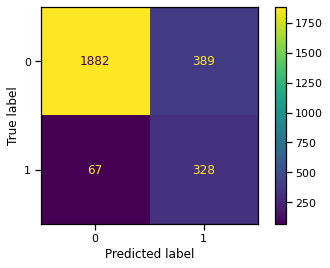

In [97]:
ConfusionMatrixDisplay.from_estimator(LG_GS.best_estimator_,X_train,y_train);


The Confusion Matrix for the Logistic Regression shows that there is improvement in the Recall score, but Precision is unacceptably poor. This model would create far too many false positives.

## K Nearest Neighbors

### Baseline Model

In [98]:
KNN_Base_Pipeline = (
    Skippa()
    .scale(columns(dtype_include='number'), type='standard')
    .onehot(columns(dtype_exclude='number'))
    .model(KNeighborsClassifier()))

In [99]:
KNN_Base_Pipeline.fit(X_train,y_train)


SkippaPipeline(steps=[('scale_standard_0',
                       SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f876f33c430>,
                                            copy=True, with_mean=True,
                                            with_std=True)),
                      ('onehot_1',
                       SkippaOneHotEncoder(categories='auto',
                                           cols=<skippa.transformers.base.ColumnSelector object at 0x7f876f33c820>,
                                           drop=None,
                                           dtype=<class 'numpy.float64'>,
                                           handle_unknown='error',
                                           sparse=False)),
                      ('model_2', KNeighborsClassifier())])

In [100]:
#Appending Models Dataframe with Baseline Score
models_df=models_df.append(score_report('KNN Base',KNN_Base_Pipeline,X_train,y_train),ignore_index=True)


In [101]:
models_df


model_name  accuracy  precision    recall        f1
0  LogisticBaseline  0.860090   0.559783  0.260759  0.355786
1     LogisticTuned  0.828957   0.457462  0.830380  0.589928
2          KNN Base  0.921980   0.943128  0.503797  0.656766

In [102]:
cross_val_report('KNN Base',KNN_Base_Pipeline,X_train,y_train)


{'model_name': 'KNN Base',
 'mean_accuracy': 0.8972264968976397,
 'std_accuracy': 0.007786197994779882,
 'mean_precision': 0.8823055679952232,
 'std_precision': 0.06781989339128049,
 'mean_recall': 0.35443037974683544,
 'std_recall': 0.028865200635421206,
 'mean_f1': 0.5052683434624526,
 'std_f1': 0.03804522322068012}

The baseline KNN shows a poor score with the recall. It's precision is better, but is overfitting.

### Tuned K Nearest Neighbors

In [103]:
#Setting Parameters for GridSearch
KNN_Params = {'model_2__weights':['uniform','distance'],'model_2__n_neighbors':list(range(3,20)),
              'model_2__metric': ['euclidean', 'manhattan','minkowski']}

In [104]:
KNN_GS = GridSearchCV(estimator=KNN_Base_Pipeline,cv=5,param_grid=KNN_Params,scoring=two_scorer,refit=True)
KNN_GS.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=SkippaPipeline(steps=[('scale_standard_0',
                                              SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f876f33c430>,
                                                                   copy=True,
                                                                   with_mean=True,
                                                                   with_std=True)),
                                             ('onehot_1',
                                              SkippaOneHotEncoder(categories='auto',
                                                                  cols=<skippa.transformers.base.ColumnSelector object at 0x7f876f33c820>,
                                                                  drop=None,
                                                                  dtype=<class 'numpy.float64'>,
                                                                  handle_u

In [105]:
KNN_Tuned = cross_val_report('KNN_Tuned',KNN_GS.best_estimator_,X,y)
cross_val_df = append_df(KNN_Tuned,cross_val_df)

In [106]:
display(models_df, cross_val_df)

model_name  accuracy  precision    recall        f1
0  LogisticBaseline  0.860090   0.559783  0.260759  0.355786
1     LogisticTuned  0.828957   0.457462  0.830380  0.589928
2          KNN Base  0.921980   0.943128  0.503797  0.656766

model_name  mean_accuracy  std_accuracy  mean_precision  \
0  Logistic_Regression_Grid       0.816595      0.026163        0.437868   
1                 KNN_Tuned       0.906691      0.007054        0.823960   

   std_precision  mean_recall  std_recall   mean_f1    std_f1  
0       0.042062     0.794937    0.032421  0.564008  0.041872  
1       0.052022     0.459515    0.071934  0.584471  0.056300

In [107]:
KNN_GS.best_params_

{'model_2__metric': 'manhattan',
 'model_2__n_neighbors': 3,
 'model_2__weights': 'uniform'}

In [108]:
models_df = append_df(score_report('KNN_Tuned',KNN_GS.best_estimator_,X_train,y_train),models_df)

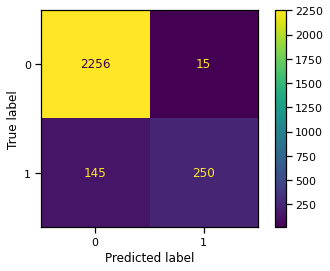

In [109]:
ConfusionMatrixDisplay.from_estimator(KNN_GS.best_estimator_,X_train,y_train);

The KNN model continues to show overfitting on the Training data, perhaps due to the nature of the KNN model. The cross-val scores show it is a not a useable model given an extremely low recall score.

## Decision Trees

### Baseline Decision Tree

In [110]:
DT_Base_Pipeline = (
    Skippa()
    .scale(columns(dtype_include='number'), type='standard')
    .onehot(columns(dtype_exclude='number'))
    #Passing the class weight balanced parameter
    .model(DecisionTreeClassifier(class_weight='balanced')))

In [111]:
DT_Base_Pipeline.fit(X_train,y_train)

SkippaPipeline(steps=[('scale_standard_0',
                       SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f876d5ed670>,
                                            copy=True, with_mean=True,
                                            with_std=True)),
                      ('onehot_1',
                       SkippaOneHotEncoder(categories='auto',
                                           cols=<skippa.transformers.base.ColumnSelector object at 0x7f876ea769a0>,
                                           drop=None,
                                           dtype=<class 'numpy.float64'>,
                                           handle_unknown='error',
                                           sparse=False)),
                      ('model_2',
                       DecisionTreeClassifier(class_weight='balanced'))])

In [112]:
models_df = append_df(score_report('Base Decision Tree',DT_Base_Pipeline,X_train,y_train),models_df)

In [113]:
models_df

model_name  accuracy  precision    recall        f1
0    LogisticBaseline  0.860090   0.559783  0.260759  0.355786
1       LogisticTuned  0.828957   0.457462  0.830380  0.589928
2            KNN Base  0.921980   0.943128  0.503797  0.656766
3           KNN_Tuned  0.939985   0.943396  0.632911  0.757576
4  Base Decision Tree  1.000000   1.000000  1.000000  1.000000

In [114]:
cross_val_report('DT_Base',DT_Base_Pipeline,X_train,y_train)

{'model_name': 'DT_Base',
 'mean_accuracy': 0.948237311240874,
 'std_accuracy': 0.004829983348033813,
 'mean_precision': 0.8045199040337234,
 'std_precision': 0.037695265607821826,
 'mean_recall': 0.8430379746835444,
 'std_recall': 0.03544303797468354,
 'mean_f1': 0.8293391750631482,
 'std_f1': 0.02168230642861171}

There's a huge gap in the cross-val scores and the perfect train score of the Decision Tree - an overfitting situation I hope to rectify with tuning.

### Tune Base Decision Tree

In [115]:
DT_Base_Pipeline.named_steps

{'scale_standard_0': SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f876d5ed670>,
                      copy=True, with_mean=True, with_std=True),
 'onehot_1': SkippaOneHotEncoder(categories='auto',
                     cols=<skippa.transformers.base.ColumnSelector object at 0x7f876ea769a0>,
                     drop=None, dtype=<class 'numpy.float64'>,
                     handle_unknown='error', sparse=False),
 'model_2': DecisionTreeClassifier(class_weight='balanced')}

Currently I've only adjusted the class weights parameter. I will try several hyperparemeters in order reduce the current overfitting on the model. 

In [116]:
DTC_Params_1 = {'model_2__class_weight':['balanced'],
                'model_2__min_samples_split': [2, 3, 4], 'model_2__max_depth':[5,10,15,20],
                'model_2__min_samples_leaf':[1,3,5,7,10],
                'model_2__ccp_alpha':[0,.5,.10,.15,.20],
                'model_2__criterion':['gini','entropy']}

In [117]:
DTC_GS = GridSearchCV(estimator=DT_Base_Pipeline,cv=5,param_grid=DTC_Params_1,scoring=two_scorer,refit=True)
DTC_GS.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=SkippaPipeline(steps=[('scale_standard_0',
                                              SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f876d5ed670>,
                                                                   copy=True,
                                                                   with_mean=True,
                                                                   with_std=True)),
                                             ('onehot_1',
                                              SkippaOneHotEncoder(categories='auto',
                                                                  cols=<skippa.transformers.base.ColumnSelector object at 0x7f876ea769a0>,
                                                                  drop=None,
                                                                  dtype=<class 'numpy.f...
                                                                  sparse=False))

In [118]:
DTC_Tuned_1 = cross_val_report('DTC_Tuned_1',DTC_GS.best_estimator_,X_train,y_train)


In [119]:
cross_val_df = append_df(DTC_Tuned_1,cross_val_df)

In [120]:
display(cross_val_df)

model_name  mean_accuracy  std_accuracy  mean_precision  \
0  Logistic_Regression_Grid       0.816595      0.026163        0.437868   
1                 KNN_Tuned       0.906691      0.007054        0.823960   
2               DTC_Tuned_1       0.972242      0.003831        0.953564   

   std_precision  mean_recall  std_recall   mean_f1    std_f1  
0       0.042062     0.794937    0.032421  0.564008  0.041872  
1       0.052022     0.459515    0.071934  0.584471  0.056300  
2       0.028113     0.855696    0.029524  0.901251  0.014103

Given the promising scores on this model, I think it's fair to try to fine tune the parameters on this model.

In [123]:
DTC_GS.best_params_


{'model_2__ccp_alpha': 0,
 'model_2__class_weight': 'balanced',
 'model_2__criterion': 'entropy',
 'model_2__max_depth': 5,
 'model_2__min_samples_leaf': 5,
 'model_2__min_samples_split': 2}

In [124]:
DTC_Params_2={'model_2__class_weight': ['balanced'],
 'model_2__criterion': ['entropy'],
 'model_2__max_depth': [4,5,6],
 'model_2__min_samples_leaf': [3,4,5],
 'model_2__min_samples_split': [2,3,4],
'model_2__max_features':[None,3,5,10,15]}

In [125]:
DTC_GS_2 = GridSearchCV(estimator=DT_Base_Pipeline,cv=5,param_grid=DTC_Params_2,scoring=two_scorer,refit=True)
DTC_GS_2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=SkippaPipeline(steps=[('scale_standard_0',
                                              SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f876d5ed670>,
                                                                   copy=True,
                                                                   with_mean=True,
                                                                   with_std=True)),
                                             ('onehot_1',
                                              SkippaOneHotEncoder(categories='auto',
                                                                  cols=<skippa.transformers.base.ColumnSelector object at 0x7f876ea769a0>,
                                                                  drop=None,
                                                                  dtype=<class 'numpy.f...
                                                                  handle_unknown

In [126]:
DTC_GS_2.best_params_

{'model_2__class_weight': 'balanced',
 'model_2__criterion': 'entropy',
 'model_2__max_depth': 5,
 'model_2__max_features': None,
 'model_2__min_samples_leaf': 5,
 'model_2__min_samples_split': 2}

In [127]:
cross_val_df=append_df(cross_val_report('DTC_Tuned_2',DTC_GS_2.best_estimator_,X_train,y_train),cross_val_df)


In [128]:
cross_val_df

model_name  mean_accuracy  std_accuracy  mean_precision  \
0  Logistic_Regression_Grid       0.816595      0.026163        0.437868   
1                 KNN_Tuned       0.906691      0.007054        0.823960   
2               DTC_Tuned_1       0.972242      0.003831        0.953564   
3               DTC_Tuned_2       0.971492      0.004508        0.953564   

   std_precision  mean_recall  std_recall   mean_f1    std_f1  
0       0.042062     0.794937    0.032421  0.564008  0.041872  
1       0.052022     0.459515    0.071934  0.584471  0.056300  
2       0.028113     0.855696    0.029524  0.901251  0.014103  
3       0.028113     0.855696    0.029524  0.896813  0.017322

Attempting to fine tune this decision tree hasn't helped the scores, let's also compare the cross_val score to the base model.

In [129]:
cross_val_df = append_df(cross_val_report('Base Decision Tree',DT_Base_Pipeline,X_train,y_train),cross_val_df)

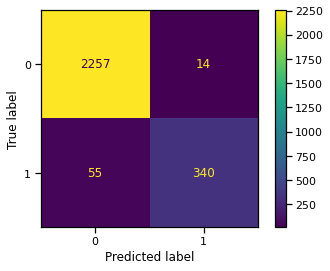

In [130]:
ConfusionMatrixDisplay.from_estimator(DTC_GS.best_estimator_,X_train,y_train);

In [131]:
models_df=append_df(score_report('Tuned Decision Tree 1',DTC_GS.best_estimator_,X_train,y_train),models_df)


In [132]:
display(models_df,cross_val_df)


model_name  accuracy  precision    recall        f1
0       LogisticBaseline  0.860090   0.559783  0.260759  0.355786
1          LogisticTuned  0.828957   0.457462  0.830380  0.589928
2               KNN Base  0.921980   0.943128  0.503797  0.656766
3              KNN_Tuned  0.939985   0.943396  0.632911  0.757576
4     Base Decision Tree  1.000000   1.000000  1.000000  1.000000
5  Tuned Decision Tree 1  0.974119   0.960452  0.860759  0.907877

model_name  mean_accuracy  std_accuracy  mean_precision  \
0  Logistic_Regression_Grid       0.816595      0.026163        0.437868   
1                 KNN_Tuned       0.906691      0.007054        0.823960   
2               DTC_Tuned_1       0.972242      0.003831        0.953564   
3               DTC_Tuned_2       0.971492      0.004508        0.953564   
4        Base Decision Tree       0.948988      0.007442        0.805902   

   std_precision  mean_recall  std_recall   mean_f1    std_f1  
0       0.042062     0.794937    0.032421  0.564008  0.041872  
1       0.052022     0.459515    0.071934  0.584471  0.056300  
2       0.028113     0.855696    0.029524  0.901251  0.014103  
3       0.028113     0.855696    0.029524  0.896813  0.017322  
4       0.020020     0.843038    0.035443  0.828996  0.027184

The first tuned Decision Tree's cross-val scores are more in line with the training scores, the GridSearch has helped reduce the overfitting, but it looks like further pruning has resulted in a reduction of the recall and score, though the standard deviation of the recall score has gone down.

## Bagged Tree

###  Baseline Bagged Tree

In [133]:
#Baseline Bagged Tree
Base_Bagged_Pipeline = (
    Skippa()
    .scale(columns(dtype_include='number'), type='standard')
    .onehot(columns(dtype_exclude='number'),drop='if_binary')
    #Passing the class_weight balanced parameter
    .model(BaggingClassifier(DecisionTreeClassifier(class_weight='balanced'))))


In [134]:
Base_Bagged_Pipeline.fit(X_train,y_train)

SkippaPipeline(steps=[('scale_standard_0',
                       SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f876d634730>,
                                            copy=True, with_mean=True,
                                            with_std=True)),
                      ('onehot_1',
                       SkippaOneHotEncoder(categories='auto',
                                           cols=<skippa.transformers.base.ColumnSelector object at 0x7f876ed090a0>,
                                           drop='if_binary',
                                           dtype=<class 'numpy.float64'>,
                                           handle_unknown='error',
                                           sparse=False)),
                      ('model_2',
                       BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced')))])

In [135]:
models_df = append_df(score_report('Base Bagged Tree',Base_Bagged_Pipeline,X_train,y_train),models_df)

In [136]:
models_df

model_name  accuracy  precision    recall        f1
0       LogisticBaseline  0.860090   0.559783  0.260759  0.355786
1          LogisticTuned  0.828957   0.457462  0.830380  0.589928
2               KNN Base  0.921980   0.943128  0.503797  0.656766
3              KNN_Tuned  0.939985   0.943396  0.632911  0.757576
4     Base Decision Tree  1.000000   1.000000  1.000000  1.000000
5  Tuned Decision Tree 1  0.974119   0.960452  0.860759  0.907877
6       Base Bagged Tree  0.993248   1.000000  0.954430  0.976684

In [137]:
cross_val_report('Base Bagged Tree',Base_Bagged_Pipeline,X_train,y_train)

{'model_name': 'Base Bagged Tree',
 'mean_accuracy': 0.9748698273499589,
 'std_accuracy': 0.005879982638414333,
 'mean_precision': 0.9909661127403062,
 'std_precision': 0.007668370931556273,
 'mean_recall': 0.8329113924050633,
 'std_recall': 0.03261797146006361,
 'mean_f1': 0.9119202690394743,
 'std_f1': 0.022411339476348945}

In [146]:
cross_val_df = append_df(cross_val_report('Base Bagged Tree',Base_Bagged_Pipeline,X_train,y_train),cross_val_df)

Once again the bagged tree shows very high scores a sure sign of overfitting! I hope to correct this during Tuning with GridSearch.

### Bagged Tree Grid Search

In [152]:
Base_Bagged_Pipeline = (
    Skippa()
    .scale(columns(dtype_include='number'), type='standard')
    .onehot(columns(dtype_exclude='number'),drop='if_binary')
    .model(BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'))
          ))

In [153]:
Bagged_Params_1={
    'model_2__n_estimators':[40,60,80],
    'model_2__max_samples':[.5,1.0,2],
    'model_2__bootstrap':[True,False],
    'model_2__bootstrap_features':[True,False]}

In [154]:
BT_GS_1 = GridSearchCV(estimator=Base_Bagged_Pipeline,cv=5,param_grid=Bagged_Params_1,scoring=two_scorer,refit=True)
BT_GS_1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=SkippaPipeline(steps=[('scale_standard_0',
                                              SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f876e785c70>,
                                                                   copy=True,
                                                                   with_mean=True,
                                                                   with_std=True)),
                                             ('onehot_1',
                                              SkippaOneHotEncoder(categories='auto',
                                                                  cols=<skippa.transformers.base.ColumnSelector object at 0x7f876e785790>,
                                                                  drop='if_binary',
                                                                  dtype=<class 'numpy.float64'>,
                                                                  h

In [155]:
cross_val_df=append_df(cross_val_report('Bagged Trees Search 1',BT_GS_1.best_estimator_,X_train,y_train),cross_val_df)

In [156]:
cross_val_df

model_name  mean_accuracy  std_accuracy  mean_precision  \
0  Logistic_Regression_Grid       0.816595      0.026163        0.437868   
1                 KNN_Tuned       0.906691      0.007054        0.823960   
2               DTC_Tuned_1       0.972242      0.003831        0.953564   
3               DTC_Tuned_2       0.971492      0.004508        0.953564   
4        Base Decision Tree       0.948988      0.007442        0.805902   
5          Base Bagged Tree       0.974870      0.006204        0.982058   
6     Bagged Trees Search 1       0.975620      0.005483        0.990862   

   std_precision  mean_recall  std_recall   mean_f1    std_f1  
0       0.042062     0.794937    0.032421  0.564008  0.041872  
1       0.052022     0.459515    0.071934  0.584471  0.056300  
2       0.028113     0.855696    0.029524  0.901251  0.014103  
3       0.028113     0.855696    0.029524  0.896813  0.017322  
4       0.020020     0.843038    0.035443  0.828996  0.027184  
5       0.012698     0.840506    0.042363  0.906120  0.018353  
6       0.006061     0.832911    0.043409  0.907347  0.025441

In [157]:
models_df = append_df(score_report('Bagged Trees Search 1',BT_GS_1.best_estimator_,X_train,y_train),models_df)


In [158]:
display(models_df,cross_val_df)

model_name  accuracy  precision    recall        f1
0       LogisticBaseline  0.860090   0.559783  0.260759  0.355786
1          LogisticTuned  0.828957   0.457462  0.830380  0.589928
2               KNN Base  0.921980   0.943128  0.503797  0.656766
3              KNN_Tuned  0.939985   0.943396  0.632911  0.757576
4     Base Decision Tree  1.000000   1.000000  1.000000  1.000000
5  Tuned Decision Tree 1  0.974119   0.960452  0.860759  0.907877
6       Base Bagged Tree  0.993248   1.000000  0.954430  0.976684
7  Bagged Trees Search 1  0.998125   1.000000  0.987342  0.993631

model_name  mean_accuracy  std_accuracy  mean_precision  \
0  Logistic_Regression_Grid       0.816595      0.026163        0.437868   
1                 KNN_Tuned       0.906691      0.007054        0.823960   
2               DTC_Tuned_1       0.972242      0.003831        0.953564   
3               DTC_Tuned_2       0.971492      0.004508        0.953564   
4        Base Decision Tree       0.948988      0.007442        0.805902   
5          Base Bagged Tree       0.974870      0.006204        0.982058   
6     Bagged Trees Search 1       0.975620      0.005483        0.990862   

   std_precision  mean_recall  std_recall   mean_f1    std_f1  
0       0.042062     0.794937    0.032421  0.564008  0.041872  
1       0.052022     0.459515    0.071934  0.584471  0.056300  
2       0.028113     0.855696    0.029524  0.901251  0.014103  
3       0.028113     0.855696    0.029524  0.896813  0.017322  
4       0.020020     0.843038    0.035443  0.828996  0.027184  
5       0.012698     0.840506    0.042363  0.906120  0.018353  
6       0.006061     0.832911    0.043409  0.907347  0.025441

In [159]:
BT_GS_1.best_estimator_.steps[2][1].estimators_
feature_importances = np.mean([tree.feature_importances_ for tree in BT_GS_1.best_estimator_.steps[2][1].estimators_], axis=0)

feature_names = Processed_X_train.columns
output = {fn:fi for fn,fi in zip(feature_names,feature_importances)}
data_items = output.items()
data_list = list(data_items)
feat_import = pd.DataFrame(data_list)
feat_import.sort_values(by=1,ascending=False).head(60)


0         1
15                    total_charge  0.313473
71          international plan_yes  0.172303
14          customer service calls  0.099556
73  Frequent Customer Service_True  0.071070
12                total intl calls  0.039648
13               total intl charge  0.038242
1            number vmail messages  0.029584
11              total intl minutes  0.028455
0                   account length  0.022803
6                  total eve calls  0.018750
3                  total day calls  0.018155
9                total night calls  0.015319
16                   total minutes  0.013673
8              total night minutes  0.010965
7                 total eve charge  0.008929
72             voice mail plan_yes  0.008847
2                total day minutes  0.008685
4                 total day charge  0.008360
5                total eve minutes  0.007341
10              total night charge  0.006861
24                        state_DC  0.004970
60                        state_TX  0.003424
43                        state_MT  0.003418
48                        state_NJ  0.003025
61                        state_UT  0.002692
38                        state_ME  0.002603
70                   area code_510  0.002479
30                        state_ID  0.002283
46                        state_NE  0.002185
39                        state_MI  0.002161
57                        state_SC  0.001991
51                        state_NY  0.001969
68                   area code_408  0.001872
69                   area code_415  0.001769
55                        state_PA  0.001742
32                        state_IN  0.001626
52                        state_OH  0.001612
47                        state_NH  0.001580
49                        state_NM  0.001507
23                        state_CT  0.001386
65                        state_WI  0.001382
42                        state_MS  0.001258
67                        state_WY  0.001182
20                        state_AZ  0.000987
45                        state_ND  0.000836
27                        state_GA  0.000759
26                        state_FL  0.000658
64                        state_WA  0.000620
36                        state_MA  0.000566
44                        state_NC  0.000550
37                        state_MD  0.000541
50                        state_NV  0.000476
35                        state_LA  0.000457
40                        state_MN  0.000446
58                        state_SD  0.000439
22                        state_CO  0.000429
62                        state_VA  0.000350
33                        state_KS  0.000220
53                        state_OK  0.000100
41                        state_MO  0.000099

In [167]:
X_train = X_train.drop(['area code','state'],axis=1)

## Random Forrest

### Baseline Forrest

In [168]:
Base_Random_Forrest = (
    Skippa()
    .scale(columns(dtype_include='number'), type='standard')
    .onehot(columns(dtype_exclude='number'))
    #Passing the class weight parameter balanced
    .model(RandomForestClassifier(class_weight='balanced'))
)

In [169]:
Base_Random_Forrest.fit(X_train,y_train)


SkippaPipeline(steps=[('scale_standard_0',
                       SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f876e78eaf0>,
                                            copy=True, with_mean=True,
                                            with_std=True)),
                      ('onehot_1',
                       SkippaOneHotEncoder(categories='auto',
                                           cols=<skippa.transformers.base.ColumnSelector object at 0x7f876e78eb50>,
                                           drop=None,
                                           dtype=<class 'numpy.float64'>,
                                           handle_unknown='error',
                                           sparse=False)),
                      ('model_2',
                       RandomForestClassifier(class_weight='balanced'))])

In [170]:
models_df = append_df(score_report('Base_R_Forrest',Base_Random_Forrest,X_train,y_train),models_df)


In [171]:
models_df

model_name  accuracy  precision    recall        f1
0       LogisticBaseline  0.860090   0.559783  0.260759  0.355786
1          LogisticTuned  0.828957   0.457462  0.830380  0.589928
2               KNN Base  0.921980   0.943128  0.503797  0.656766
3              KNN_Tuned  0.939985   0.943396  0.632911  0.757576
4     Base Decision Tree  1.000000   1.000000  1.000000  1.000000
5  Tuned Decision Tree 1  0.974119   0.960452  0.860759  0.907877
6       Base Bagged Tree  0.993248   1.000000  0.954430  0.976684
7  Bagged Trees Search 1  0.998125   1.000000  0.987342  0.993631
8         Base_R_Forrest  0.999625   1.000000  0.997468  0.998733
9         Base_R_Forrest  1.000000   1.000000  1.000000  1.000000

In [172]:
cross_val_df = append_df(cross_val_report('Based_R_Forrest',Base_Random_Forrest,X_train,y_train),cross_val_df)

In [173]:
cross_val_df

model_name  mean_accuracy  std_accuracy  mean_precision  \
0  Logistic_Regression_Grid       0.816595      0.026163        0.437868   
1                 KNN_Tuned       0.906691      0.007054        0.823960   
2               DTC_Tuned_1       0.972242      0.003831        0.953564   
3               DTC_Tuned_2       0.971492      0.004508        0.953564   
4        Base Decision Tree       0.948988      0.007442        0.805902   
5          Base Bagged Tree       0.974870      0.006204        0.982058   
6     Bagged Trees Search 1       0.975620      0.005483        0.990862   
7           Based_R_Forrest       0.962494      0.006210        1.000000   
8           Based_R_Forrest       0.972619      0.005920        0.997015   

   std_precision  mean_recall  std_recall   mean_f1    std_f1  
0       0.042062     0.794937    0.032421  0.564008  0.041872  
1       0.052022     0.459515    0.071934  0.584471  0.056300  
2       0.028113     0.855696    0.029524  0.901251  0.014103  
3       0.028113     0.855696    0.029524  0.896813  0.017322  
4       0.020020     0.843038    0.035443  0.828996  0.027184  
5       0.012698     0.840506    0.042363  0.906120  0.018353  
6       0.006061     0.832911    0.043409  0.907347  0.025441  
7       0.000000     0.746835    0.042814  0.837756  0.030257  
8       0.000000     0.792405    0.052741  0.886518  0.023516

### Tuned Random Forrest

In [174]:
rf_param_grid_1 = {
    'model_2__n_estimators': [50,100],
    'model_2__criterion': ['gini', 'entropy'],
    'model_2__max_depth': [None, 2, 6, 10],
    'model_2__min_samples_split': [5, 10],
    'model_2__min_samples_leaf': [5,10,30,50]
}

In [175]:
RF_GS_1= GridSearchCV(estimator=Base_Random_Forrest,cv=5,param_grid=rf_param_grid_1,scoring=two_scorer,refit=True)
RF_GS_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SkippaPipeline(steps=[('scale_standard_0',
                                              SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f876e78eaf0>,
                                                                   copy=True,
                                                                   with_mean=True,
                                                                   with_std=True)),
                                             ('onehot_1',
                                              SkippaOneHotEncoder(categories='auto',
                                                                  cols=<skippa.transformers.base.ColumnSelector object at 0x7f876e78eb50>,
                                                                  drop=None,
                                                                  dtype=<class 'numpy.float64'>,
                                                                  handle_u

In [176]:
cross_val_df = append_df(cross_val_report('Random_Forrest_GS_1',RF_GS_1.best_estimator_,X_train,y_train),cross_val_df)

In [177]:
cross_val_df[cross_val_df['model_name']=='Random_Forrest_GS_1']

model_name  mean_accuracy  std_accuracy  mean_precision  \
9  Random_Forrest_GS_1        0.97412      0.005101        0.993968   

   std_precision  mean_recall  std_recall   mean_f1   std_f1  
9       0.011356     0.837975    0.038059  0.909076  0.01726

This appears to be the most promising score yet, the recall score is above 82%, with a lower std of .03. 

In [178]:
RF_GS_1.best_params_

{'model_2__criterion': 'gini',
 'model_2__max_depth': None,
 'model_2__min_samples_leaf': 5,
 'model_2__min_samples_split': 10,
 'model_2__n_estimators': 100}

In [179]:
rf_param_grid_2 = {
    'model_2__n_estimators': [50,70,80],
    'model_2__criterion': ['gini', 'entropy'],
    'model_2__max_depth': [None,10,15,20],
    'model_2__min_samples_split': [10,20,30],
    'model_2__min_samples_leaf': [4,5,60,70],
}

In [180]:
RF_GS_2= GridSearchCV(estimator=Base_Random_Forrest,cv=5,param_grid=rf_param_grid_2,scoring=two_scorer,refit=True)
RF_GS_2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SkippaPipeline(steps=[('scale_standard_0',
                                              SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f876e78eaf0>,
                                                                   copy=True,
                                                                   with_mean=True,
                                                                   with_std=True)),
                                             ('onehot_1',
                                              SkippaOneHotEncoder(categories='auto',
                                                                  cols=<skippa.transformers.base.ColumnSelector object at 0x7f876e78eb50>,
                                                                  drop=None,
                                                                  dtype=<class 'numpy.f...64'>,
                                                                  handle_un

In [181]:
cross_val_df = append_df(cross_val_report('Random_Forrest_GS_2',RF_GS_2.best_estimator_,X_train,y_train),cross_val_df)

In [182]:
cross_val_df

model_name  mean_accuracy  std_accuracy  mean_precision  \
0   Logistic_Regression_Grid       0.816595      0.026163        0.437868   
1                  KNN_Tuned       0.906691      0.007054        0.823960   
2                DTC_Tuned_1       0.972242      0.003831        0.953564   
3                DTC_Tuned_2       0.971492      0.004508        0.953564   
4         Base Decision Tree       0.948988      0.007442        0.805902   
5           Base Bagged Tree       0.974870      0.006204        0.982058   
6      Bagged Trees Search 1       0.975620      0.005483        0.990862   
7            Based_R_Forrest       0.962494      0.006210        1.000000   
8            Based_R_Forrest       0.972619      0.005920        0.997015   
9        Random_Forrest_GS_1       0.974120      0.005101        0.993968   
10       Random_Forrest_GS_2       0.976369      0.004370        0.963163   

    std_precision  mean_recall  std_recall   mean_f1    std_f1  
0        0.042062     0.794937    0.032421  0.564008  0.041872  
1        0.052022     0.459515    0.071934  0.584471  0.056300  
2        0.028113     0.855696    0.029524  0.901251  0.014103  
3        0.028113     0.855696    0.029524  0.896813  0.017322  
4        0.020020     0.843038    0.035443  0.828996  0.027184  
5        0.012698     0.840506    0.042363  0.906120  0.018353  
6        0.006061     0.832911    0.043409  0.907347  0.025441  
7        0.000000     0.746835    0.042814  0.837756  0.030257  
8        0.000000     0.792405    0.052741  0.886518  0.023516  
9        0.011356     0.837975    0.038059  0.909076  0.017260  
10       0.031629     0.853165    0.031417  0.903472  0.016979

In [183]:
RF_GS_2.best_params_

{'model_2__criterion': 'gini',
 'model_2__max_depth': 15,
 'model_2__min_samples_leaf': 4,
 'model_2__min_samples_split': 20,
 'model_2__n_estimators': 80}

In [184]:
models_df = append_df(score_report('Random Forrest_GS_2',RF_GS_2.best_estimator_,X_train,y_train),models_df)


In [185]:
models_df

model_name  accuracy  precision    recall        f1
0        LogisticBaseline  0.860090   0.559783  0.260759  0.355786
1           LogisticTuned  0.828957   0.457462  0.830380  0.589928
2                KNN Base  0.921980   0.943128  0.503797  0.656766
3               KNN_Tuned  0.939985   0.943396  0.632911  0.757576
4      Base Decision Tree  1.000000   1.000000  1.000000  1.000000
5   Tuned Decision Tree 1  0.974119   0.960452  0.860759  0.907877
6        Base Bagged Tree  0.993248   1.000000  0.954430  0.976684
7   Bagged Trees Search 1  0.998125   1.000000  0.987342  0.993631
8          Base_R_Forrest  0.999625   1.000000  0.997468  0.998733
9          Base_R_Forrest  1.000000   1.000000  1.000000  1.000000
10    Random Forrest_GS_2  0.978245   0.991254  0.860759  0.921409

In [191]:
RF_GS_2.best_estimator_.steps[2][1].estimators_
feature_importances = np.mean([tree.feature_importances_ for tree in RF_GS_2.best_estimator_.steps[2][1].estimators_], axis=0)

feature_names = X_train.columns
output = {fn:fi for fn,fi in zip(feature_names,feature_importances)}
data_items = output.items()
data_list = list(data_items)
feat_import = pd.DataFrame(data_list)
feat_import.sort_values(by=1,ascending=False).head(60)

0         1
15          total intl charge  0.183256
4           total day minutes  0.080389
16     customer service calls  0.075741
17               total_charge  0.071549
14           total intl calls  0.067528
18  Frequent Customer Service  0.062968
2             voice mail plan  0.057014
12         total night charge  0.037438
13         total intl minutes  0.030492
7           total eve minutes  0.027121
11          total night calls  0.024966
5             total day calls  0.022600
1          international plan  0.018961
3       number vmail messages  0.018650
8             total eve calls  0.018575
10        total night minutes  0.017496
9            total eve charge  0.016685
6            total day charge  0.016638
0              account length  0.015812
19              total minutes  0.013292

### Random Forrest Summary

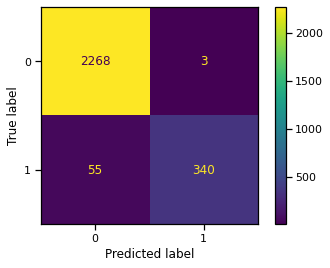

In [192]:
ConfusionMatrixDisplay.from_estimator(RF_GS_2.best_estimator_,X_train,y_train);


The best tuned Random Forrest model shows improvement with overfitting, but is still overfitting somewhat given the scores on the train vs cross-val scoring. The confusion matrix does indeed look promising though.

## AdaBoost

In [195]:
Base_Adaboost = (
    Skippa()
    .scale(columns(dtype_include='number'), type='standard')
    .onehot(columns(dtype_exclude='number'))
    .model(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced')))
)

In [196]:
Base_Adaboost.fit(X_train,y_train)

SkippaPipeline(steps=[('scale_standard_0',
                       SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f87579ec2b0>,
                                            copy=True, with_mean=True,
                                            with_std=True)),
                      ('onehot_1',
                       SkippaOneHotEncoder(categories='auto',
                                           cols=<skippa.transformers.base.ColumnSelector object at 0x7f87579ec550>,
                                           drop=None,
                                           dtype=<class 'numpy.float64'>,
                                           handle_unknown='error',
                                           sparse=False)),
                      ('model_2',
                       AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced')))])

In [197]:
score_report('Base Adaboost',Base_Adaboost,X_train,y_train)

{'model_name': 'Base Adaboost',
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0}

Unsurprisingly Adaboost, a powerful boosting algarithm is overfitting the training data.

### Tuned Adaboost

In [198]:
Adaboost_Params={'model_2__n_estimators':[10, 50, 100, 500],
'model_2__learning_rate':[0.1,.3,.5,1.0]} 

In [199]:
Ada_GS_1= GridSearchCV(estimator=Base_Adaboost,cv=5,param_grid=Adaboost_Params,scoring=two_scorer,refit=True)
Ada_GS_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SkippaPipeline(steps=[('scale_standard_0',
                                              SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f87579ec2b0>,
                                                                   copy=True,
                                                                   with_mean=True,
                                                                   with_std=True)),
                                             ('onehot_1',
                                              SkippaOneHotEncoder(categories='auto',
                                                                  cols=<skippa.transformers.base.ColumnSelector object at 0x7f87579ec550>,
                                                                  drop=None,
                                                                  dtype=<class 'numpy.float64'>,
                                                                  handle_u

In [200]:
cross_val_report('Ada Grid Search 1',Ada_GS_1.best_estimator_,X_train,y_train)

{'model_name': 'Ada Grid Search 1',
 'mean_accuracy': 0.9459866067977879,
 'std_accuracy': 0.00792264457488836,
 'mean_precision': 0.7999509238748355,
 'std_precision': 0.024556253784071627,
 'mean_recall': 0.8455696202531646,
 'std_recall': 0.03300861977317796,
 'mean_f1': 0.8205681832531958,
 'std_f1': 0.023110829272990647}

In [201]:
Adaboost_Params_2={'model_2__n_estimators':[50,500,1000],
'model_2__learning_rate':[.1,.3,1,1.5]} 

In [202]:
Ada_GS_2= GridSearchCV(estimator=Base_Adaboost,cv=5,param_grid=Adaboost_Params_2,scoring=two_scorer,refit=True)
Ada_GS_2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SkippaPipeline(steps=[('scale_standard_0',
                                              SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f87579ec2b0>,
                                                                   copy=True,
                                                                   with_mean=True,
                                                                   with_std=True)),
                                             ('onehot_1',
                                              SkippaOneHotEncoder(categories='auto',
                                                                  cols=<skippa.transformers.base.ColumnSelector object at 0x7f87579ec550>,
                                                                  drop=None,
                                                                  dtype=<class 'numpy.float64'>,
                                                                  handle_u

In [203]:
cross_val_df = append_df(cross_val_report('Ada Grid Search 2',Ada_GS_2.best_estimator_,X_train,y_train), cross_val_df)


In [204]:
models_df = append_df(score_report('Ada Grid Search 2',Ada_GS_2.best_estimator_,X_train,y_train),models_df)

In [205]:
display(cross_val_df,models_df)

model_name  mean_accuracy  std_accuracy  mean_precision  \
0   Logistic_Regression_Grid       0.816595      0.026163        0.437868   
1                  KNN_Tuned       0.906691      0.007054        0.823960   
2                DTC_Tuned_1       0.972242      0.003831        0.953564   
3                DTC_Tuned_2       0.971492      0.004508        0.953564   
4         Base Decision Tree       0.948988      0.007442        0.805902   
5           Base Bagged Tree       0.974870      0.006204        0.982058   
6      Bagged Trees Search 1       0.975620      0.005483        0.990862   
7            Based_R_Forrest       0.962494      0.006210        1.000000   
8            Based_R_Forrest       0.972619      0.005920        0.997015   
9        Random_Forrest_GS_1       0.974120      0.005101        0.993968   
10       Random_Forrest_GS_2       0.976369      0.004370        0.963163   
11         Ada Grid Search 2       0.947109      0.007837        0.799717   

    std_precision  mean_recall  std_recall   mean_f1    std_f1  
0        0.042062     0.794937    0.032421  0.564008  0.041872  
1        0.052022     0.459515    0.071934  0.584471  0.056300  
2        0.028113     0.855696    0.029524  0.901251  0.014103  
3        0.028113     0.855696    0.029524  0.896813  0.017322  
4        0.020020     0.843038    0.035443  0.828996  0.027184  
5        0.012698     0.840506    0.042363  0.906120  0.018353  
6        0.006061     0.832911    0.043409  0.907347  0.025441  
7        0.000000     0.746835    0.042814  0.837756  0.030257  
8        0.000000     0.792405    0.052741  0.886518  0.023516  
9        0.011356     0.837975    0.038059  0.909076  0.017260  
10       0.031629     0.853165    0.031417  0.903472  0.016979  
11       0.031353     0.845570    0.032618  0.820537  0.023214

model_name  accuracy  precision    recall        f1
0        LogisticBaseline  0.860090   0.559783  0.260759  0.355786
1           LogisticTuned  0.828957   0.457462  0.830380  0.589928
2                KNN Base  0.921980   0.943128  0.503797  0.656766
3               KNN_Tuned  0.939985   0.943396  0.632911  0.757576
4      Base Decision Tree  1.000000   1.000000  1.000000  1.000000
5   Tuned Decision Tree 1  0.974119   0.960452  0.860759  0.907877
6        Base Bagged Tree  0.993248   1.000000  0.954430  0.976684
7   Bagged Trees Search 1  0.998125   1.000000  0.987342  0.993631
8          Base_R_Forrest  0.999625   1.000000  0.997468  0.998733
9          Base_R_Forrest  1.000000   1.000000  1.000000  1.000000
10    Random Forrest_GS_2  0.978245   0.991254  0.860759  0.921409
11      Ada Grid Search 2  1.000000   1.000000  1.000000  1.000000

In [206]:
Processed_X_train = Preprocessed.fit_transform(X_train)


In [207]:
BT_GS_1.best_estimator_.steps[2][1].estimators_
feature_importances = np.mean([tree.feature_importances_ for tree in Ada_GS_1.best_estimator_.steps[2][1].estimators_], axis=0)

feature_names = Processed_X_train.columns
output = {fn:fi for fn,fi in zip(feature_names,feature_importances)}
data_items = output.items()
data_list = list(data_items)
feat_import = pd.DataFrame(data_list)
feat_import.sort_values(by=1,ascending=False).head(60)

0         1
15                    total_charge  0.310398
17          international plan_yes  0.178703
11              total intl minutes  0.086489
0                   account length  0.030877
19  Frequent Customer Service_True  0.028984
12                total intl calls  0.028829
3                  total day calls  0.021809
10              total night charge  0.021460
16                   total minutes  0.021297
5                total eve minutes  0.021116
7                 total eve charge  0.014070
9                total night calls  0.013971
2                total day minutes  0.012432
13               total intl charge  0.011267
4                 total day charge  0.010116
18             voice mail plan_yes  0.009161
8              total night minutes  0.008630
1            number vmail messages  0.008610
6                  total eve calls  0.008019
14          customer service calls  0.007858

The Adaboost showed very high overfitting with low recall scores on the cross-val scores of the tuned model.

### Removing Features 

Through both the Random Forest model and the Bagged models it is clear that the state features and the area code features are not helping the model and can be safely dropped. This confirms my suspicion from my EDA investigation. 

In [ ]:
X_train.columns

## XGBOOST

### Baseline XGBoost

In [210]:
 Base_XGBOOST = (
    Skippa()
    .scale(columns(dtype_include='number'), type='standard')
    .onehot(columns(dtype_exclude='number'),drop='if_binary')
    .model(XGBClassifier(scale_pos_weight=80))
)

In [211]:
Base_XGBOOST.fit(X_train,y_train)

SkippaPipeline(steps=[('scale_standard_0',
                       SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f87577f0340>,
                                            copy=True, with_mean=True,
                                            with_std=True)),
                      ('onehot_1',
                       SkippaOneHotEncoder(categories='auto',
                                           cols=<skippa.transformers.base.ColumnSelector object at 0x7f87577f0820>,
                                           drop='if_binary',
                                           dtype=<class 'numpy.float64'>,
                                           handle_unkno...
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                  

In [212]:
score_report('XGB_Base',Base_XGBOOST,X_train,y_train)


{'model_name': 'XGB_Base',
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0}

In [213]:
models_df = append_df(score_report('XGB_Base',Base_XGBOOST,X_train,y_train),models_df)

In [214]:
cross_val_report('XGB_Base',Base_XGBOOST,X_train,y_train)


{'model_name': 'XGB_Base',
 'mean_accuracy': 0.9699924812558411,
 'std_accuracy': 0.007781061140807465,
 'mean_precision': 0.9413935078616437,
 'std_precision': 0.029219099241869537,
 'mean_recall': 0.8506329113924052,
 'std_recall': 0.031416895306305974,
 'mean_f1': 0.8935274427237193,
 'std_f1': 0.027688908546523793}

In [215]:
cross_val_df = append_df(cross_val_report('XGB_Base',Base_XGBOOST,X_train,y_train),cross_val_df)


The XGBOOST is certainly overfitting, if I can get the overfitting to decrease it promises to be the best model.

### Tuned XGBOOST with Bayes Search

In order to tune the XGBOOST I'm opting to use the Bayes Search CV instead of the Grid Search. The Bayes Search employs a Grid Search, but in a less naive way, using a range of values and informing the selection of the parameters from previous iterations. I will run it for 30 iterations.

In [224]:
param_space = {
        "model_2__max_depth": Integer(4, 30),
        "model_2__lambda":Real(.1,1),
        "model_2__learning_rate":Real(.3,1),
        'model_2__colsample_bytree':Real(.1,1),
        "model_2__subsample":Real(.1,1),
        "model_2__n_estimators": Integer(50, 300),
        "model_2__gamma": Real(.1,1),
        "model_2__scale_pos_weight":Real(70,100)
        
    }

In [225]:
XGB_B_Search = BayesSearchCV(Base_XGBOOST, search_spaces=param_space, n_iter=30, # specify how many iterations
                                    scoring=two_scorer, n_jobs=-1, cv=5)

XGB_B_Search.fit(X_train, y_train) 


BayesSearchCV(cv=5,
              estimator=SkippaPipeline(steps=[('scale_standard_0',
                                               SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f87577f0340>,
                                                                    copy=True,
                                                                    with_mean=True,
                                                                    with_std=True)),
                                              ('onehot_1',
                                               SkippaOneHotEncoder(categories='auto',
                                                                   cols=<skippa.transformers.base.ColumnSelector object at 0x7f87577f0820>,
                                                                   drop='if_binary',
                                                                   dtype=<class...
                             'model_2__learning_rate': Real(low=0.3, hi

In [226]:
cross_val_df = append_df(cross_val_report('XGB_Bayes_Search',XGB_B_Search.best_estimator_,X_train,y_train),cross_val_df)


In [227]:
models_df = append_df(score_report('XGB_Bayes_Search',XGB_B_Search.best_estimator_,X_train,y_train),models_df)

In [220]:
models_df

model_name  accuracy  precision    recall        f1
0        LogisticBaseline  0.860090   0.559783  0.260759  0.355786
1           LogisticTuned  0.828957   0.457462  0.830380  0.589928
2                KNN Base  0.921980   0.943128  0.503797  0.656766
3               KNN_Tuned  0.939985   0.943396  0.632911  0.757576
4      Base Decision Tree  1.000000   1.000000  1.000000  1.000000
5   Tuned Decision Tree 1  0.974119   0.960452  0.860759  0.907877
6        Base Bagged Tree  0.993248   1.000000  0.954430  0.976684
7   Bagged Trees Search 1  0.998125   1.000000  0.987342  0.993631
8          Base_R_Forrest  0.999625   1.000000  0.997468  0.998733
9          Base_R_Forrest  1.000000   1.000000  1.000000  1.000000
10    Random Forrest_GS_2  0.978245   0.991254  0.860759  0.921409
11      Ada Grid Search 2  1.000000   1.000000  1.000000  1.000000
12               XGB_Base  1.000000   1.000000  1.000000  1.000000
13       XGB_Bayes_Search  1.000000   1.000000  1.000000  1.000000

In [228]:
cross_val_df

model_name  mean_accuracy  std_accuracy  mean_precision  \
0   Logistic_Regression_Grid       0.816595      0.026163        0.437868   
1                  KNN_Tuned       0.906691      0.007054        0.823960   
2                DTC_Tuned_1       0.972242      0.003831        0.953564   
3                DTC_Tuned_2       0.971492      0.004508        0.953564   
4         Base Decision Tree       0.948988      0.007442        0.805902   
5           Base Bagged Tree       0.974870      0.006204        0.982058   
6      Bagged Trees Search 1       0.975620      0.005483        0.990862   
7            Based_R_Forrest       0.962494      0.006210        1.000000   
8            Based_R_Forrest       0.972619      0.005920        0.997015   
9        Random_Forrest_GS_1       0.974120      0.005101        0.993968   
10       Random_Forrest_GS_2       0.976369      0.004370        0.963163   
11         Ada Grid Search 2       0.947109      0.007837        0.799717   
12                  XGB_Base       0.969992      0.007781        0.941394   
13          XGB_Bayes_Search       0.945610      0.004907        0.814780   
14          XGB_Bayes_Search       0.974119      0.005861        0.965916   

    std_precision  mean_recall  std_recall   mean_f1    std_f1  
0        0.042062     0.794937    0.032421  0.564008  0.041872  
1        0.052022     0.459515    0.071934  0.584471  0.056300  
2        0.028113     0.855696    0.029524  0.901251  0.014103  
3        0.028113     0.855696    0.029524  0.896813  0.017322  
4        0.020020     0.843038    0.035443  0.828996  0.027184  
5        0.012698     0.840506    0.042363  0.906120  0.018353  
6        0.006061     0.832911    0.043409  0.907347  0.025441  
7        0.000000     0.746835    0.042814  0.837756  0.030257  
8        0.000000     0.792405    0.052741  0.886518  0.023516  
9        0.011356     0.837975    0.038059  0.909076  0.017260  
10       0.031629     0.853165    0.031417  0.903472  0.016979  
11       0.031353     0.845570    0.032618  0.820537  0.023214  
12       0.029219     0.850633    0.031417  0.893527  0.027689  
13       0.025273     0.820253    0.009473  0.817316  0.014348  
14       0.020621     0.855696    0.029524  0.907212  0.021684

In [222]:
XGB_B_Search.best_params_


OrderedDict([('model_2__colsample_bytree', 0.5),
             ('model_2__gamma', 1.0),
             ('model_2__lambda', 0.1),
             ('model_2__learning_rate', 0.3),
             ('model_2__max_depth', 4),
             ('model_2__n_estimators', 300),
             ('model_2__scale_pos_weight', 70.0),
             ('model_2__subsample', 0.5)])

In [223]:
display(models_df,cross_val_df)

model_name  accuracy  precision    recall        f1
0        LogisticBaseline  0.860090   0.559783  0.260759  0.355786
1           LogisticTuned  0.828957   0.457462  0.830380  0.589928
2                KNN Base  0.921980   0.943128  0.503797  0.656766
3               KNN_Tuned  0.939985   0.943396  0.632911  0.757576
4      Base Decision Tree  1.000000   1.000000  1.000000  1.000000
5   Tuned Decision Tree 1  0.974119   0.960452  0.860759  0.907877
6        Base Bagged Tree  0.993248   1.000000  0.954430  0.976684
7   Bagged Trees Search 1  0.998125   1.000000  0.987342  0.993631
8          Base_R_Forrest  0.999625   1.000000  0.997468  0.998733
9          Base_R_Forrest  1.000000   1.000000  1.000000  1.000000
10    Random Forrest_GS_2  0.978245   0.991254  0.860759  0.921409
11      Ada Grid Search 2  1.000000   1.000000  1.000000  1.000000
12               XGB_Base  1.000000   1.000000  1.000000  1.000000
13       XGB_Bayes_Search  1.000000   1.000000  1.000000  1.000000

model_name  mean_accuracy  std_accuracy  mean_precision  \
0   Logistic_Regression_Grid       0.816595      0.026163        0.437868   
1                  KNN_Tuned       0.906691      0.007054        0.823960   
2                DTC_Tuned_1       0.972242      0.003831        0.953564   
3                DTC_Tuned_2       0.971492      0.004508        0.953564   
4         Base Decision Tree       0.948988      0.007442        0.805902   
5           Base Bagged Tree       0.974870      0.006204        0.982058   
6      Bagged Trees Search 1       0.975620      0.005483        0.990862   
7            Based_R_Forrest       0.962494      0.006210        1.000000   
8            Based_R_Forrest       0.972619      0.005920        0.997015   
9        Random_Forrest_GS_1       0.974120      0.005101        0.993968   
10       Random_Forrest_GS_2       0.976369      0.004370        0.963163   
11         Ada Grid Search 2       0.947109      0.007837        0.799717   
12                  XGB_Base       0.969992      0.007781        0.941394   
13          XGB_Bayes_Search       0.945610      0.004907        0.814780   

    std_precision  mean_recall  std_recall   mean_f1    std_f1  
0        0.042062     0.794937    0.032421  0.564008  0.041872  
1        0.052022     0.459515    0.071934  0.584471  0.056300  
2        0.028113     0.855696    0.029524  0.901251  0.014103  
3        0.028113     0.855696    0.029524  0.896813  0.017322  
4        0.020020     0.843038    0.035443  0.828996  0.027184  
5        0.012698     0.840506    0.042363  0.906120  0.018353  
6        0.006061     0.832911    0.043409  0.907347  0.025441  
7        0.000000     0.746835    0.042814  0.837756  0.030257  
8        0.000000     0.792405    0.052741  0.886518  0.023516  
9        0.011356     0.837975    0.038059  0.909076  0.017260  
10       0.031629     0.853165    0.031417  0.903472  0.016979  
11       0.031353     0.845570    0.032618  0.820537  0.023214  
12       0.029219     0.850633    0.031417  0.893527  0.027689  
13       0.025273     0.820253    0.009473  0.817316  0.014348

In [ ]:
XGB_B_Search.best_params_

The XGB Bayes search increased the recall score, but it shows a higher recall std. I will make one more attempt at tuning the XGB model with the Bayes Search. The training scores are still overfitting, I will judge the model on its cross-val scores.

In [229]:
param_space_2 = {
        "model_2__max_depth": Integer(3,30),
        "model_2__lambda":Real(.1,1),
        "model_2__learning_rate":Real(.3,1),
        'model_2__colsample_bytree':Real(.1,1),
        "model_2__subsample":Real(.1,1),
        "model_2__n_estimators": Integer(50, 500),
        "model_2__gamma": Real(.1,1),
        "model_2__scale_pos_weight":Real(50,100)
        
    }

In [230]:
XGB_B_Search_2 = BayesSearchCV(Base_XGBOOST, search_spaces=param_space, n_iter=30, # specify how many iterations
                                    scoring=two_scorer, n_jobs=-1, cv=5)

XGB_B_Search_2.fit(X_train, y_train) 

BayesSearchCV(cv=5,
              estimator=SkippaPipeline(steps=[('scale_standard_0',
                                               SkippaStandardScaler(cols=<skippa.transformers.base.ColumnSelector object at 0x7f87577f0340>,
                                                                    copy=True,
                                                                    with_mean=True,
                                                                    with_std=True)),
                                              ('onehot_1',
                                               SkippaOneHotEncoder(categories='auto',
                                                                   cols=<skippa.transformers.base.ColumnSelector object at 0x7f87577f0820>,
                                                                   drop='if_binary',
                                                                   dtype=<class...
                             'model_2__learning_rate': Real(low=0.3, hi

In [231]:
XGB_B_Search_2.best_params_

OrderedDict([('model_2__colsample_bytree', 0.6913052384757143),
             ('model_2__gamma', 1.0),
             ('model_2__lambda', 0.1902534920353916),
             ('model_2__learning_rate', 0.3),
             ('model_2__max_depth', 13),
             ('model_2__n_estimators', 293),
             ('model_2__scale_pos_weight', 100.0),
             ('model_2__subsample', 1.0)])

In [232]:
cross_val_df = append_df(cross_val_report('XGB_Bayes_Search_2',XGB_B_Search_2.best_estimator_,X_train,y_train),cross_val_df)

In [233]:
models_df = append_df(score_report('XGB_Bayes_Search_2',XGB_B_Search_2.best_estimator_,X_train,y_train),models_df)

## Final Model Selection

In [234]:
display(cross_val_df,models_df)

model_name  mean_accuracy  std_accuracy  mean_precision  \
0   Logistic_Regression_Grid       0.816595      0.026163        0.437868   
1                  KNN_Tuned       0.906691      0.007054        0.823960   
2                DTC_Tuned_1       0.972242      0.003831        0.953564   
3                DTC_Tuned_2       0.971492      0.004508        0.953564   
4         Base Decision Tree       0.948988      0.007442        0.805902   
5           Base Bagged Tree       0.974870      0.006204        0.982058   
6      Bagged Trees Search 1       0.975620      0.005483        0.990862   
7            Based_R_Forrest       0.962494      0.006210        1.000000   
8            Based_R_Forrest       0.972619      0.005920        0.997015   
9        Random_Forrest_GS_1       0.974120      0.005101        0.993968   
10       Random_Forrest_GS_2       0.976369      0.004370        0.963163   
11         Ada Grid Search 2       0.947109      0.007837        0.799717   
12                  XGB_Base       0.969992      0.007781        0.941394   
13          XGB_Bayes_Search       0.945610      0.004907        0.814780   
14          XGB_Bayes_Search       0.974119      0.005861        0.965916   
15        XGB_Bayes_Search_2       0.971493      0.005486        0.946821   

    std_precision  mean_recall  std_recall   mean_f1    std_f1  
0        0.042062     0.794937    0.032421  0.564008  0.041872  
1        0.052022     0.459515    0.071934  0.584471  0.056300  
2        0.028113     0.855696    0.029524  0.901251  0.014103  
3        0.028113     0.855696    0.029524  0.896813  0.017322  
4        0.020020     0.843038    0.035443  0.828996  0.027184  
5        0.012698     0.840506    0.042363  0.906120  0.018353  
6        0.006061     0.832911    0.043409  0.907347  0.025441  
7        0.000000     0.746835    0.042814  0.837756  0.030257  
8        0.000000     0.792405    0.052741  0.886518  0.023516  
9        0.011356     0.837975    0.038059  0.909076  0.017260  
10       0.031629     0.853165    0.031417  0.903472  0.016979  
11       0.031353     0.845570    0.032618  0.820537  0.023214  
12       0.029219     0.850633    0.031417  0.893527  0.027689  
13       0.025273     0.820253    0.009473  0.817316  0.014348  
14       0.020621     0.855696    0.029524  0.907212  0.021684  
15       0.016334     0.855696    0.029524  0.898734  0.020464

model_name  accuracy  precision    recall        f1
0        LogisticBaseline  0.860090   0.559783  0.260759  0.355786
1           LogisticTuned  0.828957   0.457462  0.830380  0.589928
2                KNN Base  0.921980   0.943128  0.503797  0.656766
3               KNN_Tuned  0.939985   0.943396  0.632911  0.757576
4      Base Decision Tree  1.000000   1.000000  1.000000  1.000000
5   Tuned Decision Tree 1  0.974119   0.960452  0.860759  0.907877
6        Base Bagged Tree  0.993248   1.000000  0.954430  0.976684
7   Bagged Trees Search 1  0.998125   1.000000  0.987342  0.993631
8          Base_R_Forrest  0.999625   1.000000  0.997468  0.998733
9          Base_R_Forrest  1.000000   1.000000  1.000000  1.000000
10    Random Forrest_GS_2  0.978245   0.991254  0.860759  0.921409
11      Ada Grid Search 2  1.000000   1.000000  1.000000  1.000000
12               XGB_Base  1.000000   1.000000  1.000000  1.000000
13       XGB_Bayes_Search  1.000000   1.000000  1.000000  1.000000
14       XGB_Bayes_Search  1.000000   1.000000  1.000000  1.000000
15     XGB_Bayes_Search_2  1.000000   1.000000  1.000000  1.000000

Looking at all the models above, it seems to be a tough call. The Random Forrest Grid Search 1 seems to overfit less than the XGBOOST model, but has a slightly lower recall score, I think the cross-val scores give reason to go with the XGBOOST model. The first tuned XGBOOST does have a lower recall score so I will test that on the test data.

### Test Data Scoring

In [ ]:
X_test=X_test.drop(['area code','state'],axis=1)

In [363]:
score_report('XGB_Bayes_Search',XGB_B_Search.best_estimator_,X_test,y_test)

{'model_name': 'XGB_Bayes_Search',
 'accuracy': 0.9850074962518741,
 'precision': 1.0,
 'recall': 0.8863636363636364,
 'f1': 0.9397590361445783}

On the test data the model was able to correctly predict 81.25% correctly the actual Churn customers, it misidentified non-churn customers 14.3% of the time.

In [498]:
print(classification_report(y_test,y_preds))

NameError: name 'classification_report' is not defined

As shown above it is harder for the model to correctly identify churn customers vs. non-churn customers, but it has many more examples of non-churn customers to work with in the training process.

In [247]:
final_model = XGB_B_Search.best_estimator_

## Scoring Visualized

### Confusion Matrix

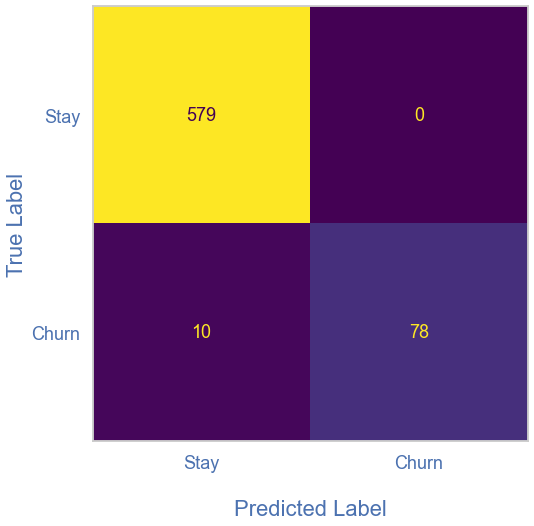

In [497]:
sns.set_context('talk')
fig,ax = plt.subplots(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(XGB_B_Search.best_estimator_,X_test,y_test,colorbar=False,display_labels=['No Churn','Churn'],ax=ax)
ax.set_xlabel('\nPredicted Label',fontsize=22,color='b');
ax.set_ylabel('True Label',fontsize=22,color='b');
ax.set_xticklabels(['Stay','Churn'],color='b',fontsize=18)
ax.set_yticklabels(['Stay','Churn'],color='b',fontsize=18)
plt.grid(False)
fig.set_facecolor('#00000000')
plt.show()

In [244]:
labels = ['True Retention','False Churn','False Retention','True Churn']
categories = ['No Churn', 'Churn']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

NameError: name 'make_confusion_matrix' is not defined

### ROC Curve

In [254]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

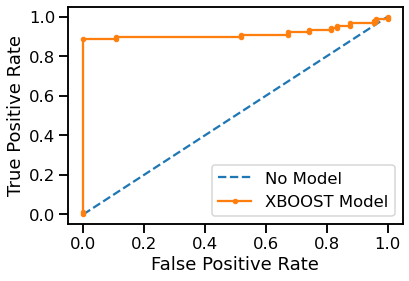

In [256]:
y_probs = final_model.predict_proba(X_test)
pred_probs = y_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)
XG_auc = roc_auc_score(y_test, pred_probs)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
XG_fpr, XG_tpr, _ = roc_curve(y_test, pred_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Model')
plt.plot(XG_fpr, XG_tpr, marker='.', label='XBOOST Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [257]:
print(f'The AUC score for the XGBOOST model is {XG_auc}.')

The AUC score for the XGBOOST model is 0.9149395509499136.


In [258]:
final_model = XGB_B_Search.best_estimator_

## Model Interpretation

In [259]:
feat_import = final_model.steps[2][1].get_booster().get_score(importance_type='total_gain')

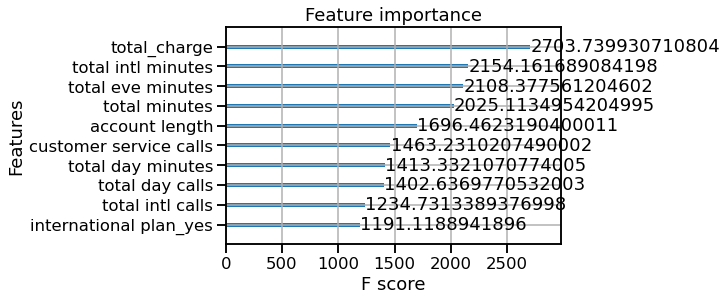

In [260]:
from xgboost import plot_importance
plot_importance(final_model.steps[2][1].get_booster().get_score(importance_type='total_gain'), max_num_features=10) # top 10 most important features
plt.show()

In [261]:
feat_import

{'total_charge': 2703.739930710804,
 'customer service calls': 1463.2310207490002,
 'total intl calls': 1234.7313389376998,
 'total minutes': 2025.1134954204995,
 'total intl minutes': 2154.161689084198,
 'total eve calls': 986.8119664710997,
 'total night charge': 570.8382362543001,
 'total day calls': 1402.6369770532003,
 'total day minutes': 1413.3321070774005,
 'total eve minutes': 2108.377561204602,
 'account length': 1696.4623190400011,
 'international plan_yes': 1191.1188941896,
 'number vmail messages': 467.2237899031,
 'total day charge': 308.8710778766,
 'total night minutes': 1176.8455374189987,
 'total night calls': 1053.5156644798005,
 'total intl charge': 262.7967705709,
 'voice mail plan_yes': 47.158510602099994,
 'Frequent Customer Service_True': 140.3951658486,
 'total eve charge': 177.1661699694}

In [262]:

# plot feature importance
from xgboost import plot_importance
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

### Shapley Scores

Shapley values can help understand what is contributing to decisions the model is making. What are the most important features in the model. 

In [263]:
import shap

In [323]:
# Processed_X_train = Preprocessed.fit_transform(X_train)
Processed_X_train = Preprocessed.fit_transform(X_train)
Processed_X_test = Preprocessed.transform(X_test)

In [324]:
Processed_X_test

account length  number vmail messages  total day minutes  \
1970        0.056559              -0.596248          -0.222823   
1338       -1.819818              -0.596248          -0.372017   
802        -0.418790              -0.596248           0.204499   
1381       -1.394506              -0.596248          -0.445693   
2202        0.281724               0.572681           0.375796   
...              ...                    ...                ...   
1781        2.508358               0.937971           0.222918   
344        -0.919157               2.106900          -0.465954   
2821        0.732054              -0.596248           1.328061   
1432       -0.944176              -0.596248          -0.283606   
2250       -0.643955              -0.596248           0.543410   

      total day calls  total day charge  total eve minutes  total eve calls  \
1970         1.042793         -0.222450           0.223699         1.136007   
1338        -1.069734         -0.371970           0.299356         1.540110   
802         -0.617050          0.204440           2.332135         0.933956   
1381         0.489512         -0.445646           1.167418         0.125751   
2202        -1.421822          0.375630          -0.076938        -0.480402   
...               ...               ...                ...              ...   
1781        -0.164365          0.222859           0.745333        -0.985530   
344         -0.415857         -0.466232          -2.354606         0.125751   
2821         0.036828          1.328007          -0.626445         0.226777   
1432        -1.270927         -0.283125          -1.070431         0.883443   
2250         1.646372          0.543569           0.195825         1.034982   

      total eve charge  total night minutes  total night calls  \
1970          0.224472             0.151424          -1.379261   
1338          0.299426             0.122140           0.801977   
802           2.332561             0.914756          -1.074902   
1381          1.168427            -0.160937          -0.111100   
2202         -0.077688            -0.963315          -0.415458   
...                ...                  ...                ...   
1781          0.744467            -1.646605           1.258515   
344          -2.354424            -0.674381          -0.060373   
2821         -0.625791             0.170946          -1.835799   
1432         -1.070832             1.020178          -0.161826   
2250          0.196364             1.771797           1.157062   

      total night charge  total intl minutes  total intl calls  \
1970            0.151825            0.985768         -0.595506   
1338            0.121457           -0.344985         -0.595506   
802             0.915369           -1.352041         -0.187797   
1381           -0.160534            0.266442         -1.410923   
2202           -0.963123            0.050644         -0.595506   
...                  ...                 ...               ...   
1781           -1.648577            1.741060         -0.595506   
344            -0.672455            1.093667         -0.595506   
2821            0.169178           -1.639772          0.219912   
1432            1.019488            0.338375         -1.003214   
2250            1.770017           -1.100277         -0.187797   

      total intl charge  customer service calls  total_charge  total minutes  \
1970           0.985131                2.590083     -0.000504       0.107046   
1338          -0.346971                0.321882     -0.203650       0.001504   
802           -1.346048               -1.190253      1.234586       1.903475   
1381           0.265796               -0.434186      0.067211       0.299243   
2202           0.052659               -0.434186      0.091055      -0.362892   
...                 ...                     ...           ...            ...   
1781           1.744429               -0.434186      0.261774      -0.332896   
344            1.091699               

In [341]:
shap_values = shap.TreeExplainer(final_model.steps[2][1])
shap_values = explainer.shap_values(Processed_X_train)
# shap.summary_plot(shap_values, Processed_X_train, plot_type="bar")

The above values show the biggest influences on the models decisions. Total day charge, total minutes, customer service calls, and not having the international plan show the greatest influence.

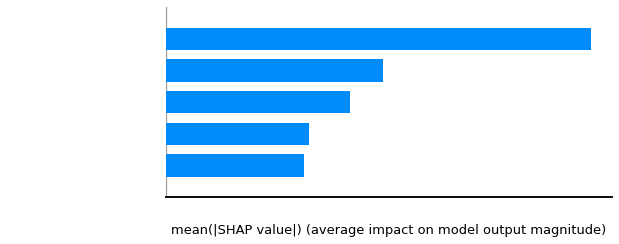

In [360]:
shap.summary_plot(shap_values, Processed_X_train, plot_type="bar",max_display=5,axis_color='w')

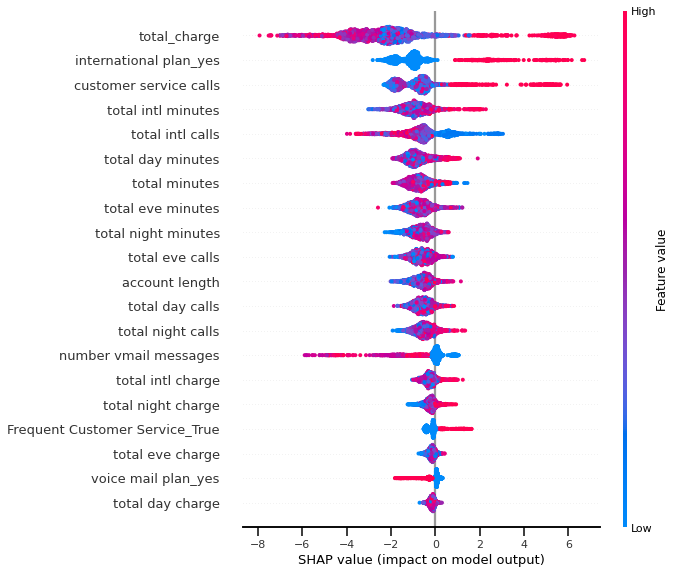

In [344]:
shap.summary_plot(shap_values, Processed_X_train)

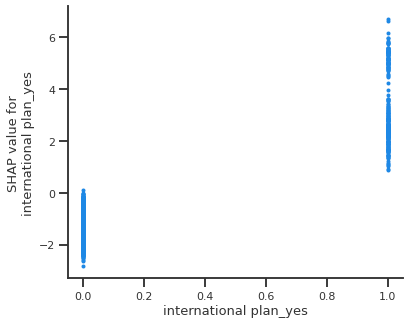

In [346]:
shap.dependence_plot('international plan_yes', shap_values, Processed_X_train, interaction_index=None)

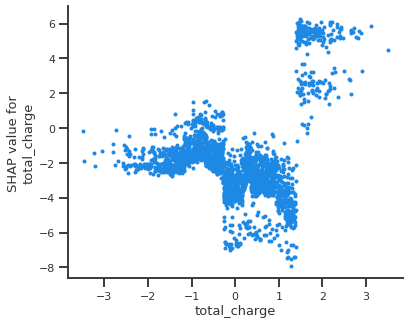

In [347]:
shap.dependence_plot('total_charge', shap_values, Processed_X_train, interaction_index=None)

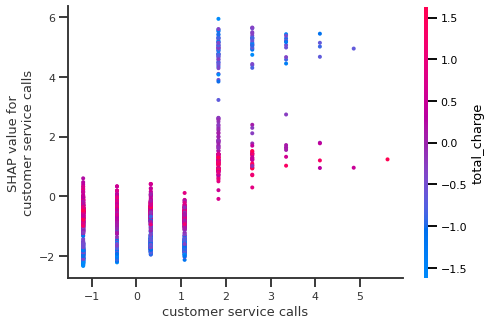

In [352]:
shap.dependence_plot('customer service calls', shap_values, Processed_X_train)

In [353]:
shap.force_plot(explainer.expected_value, shap_values, Processed_X_train)

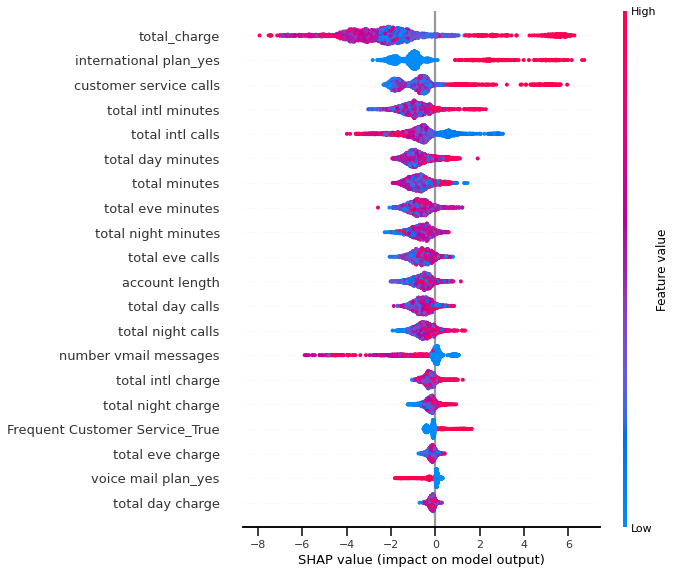

In [298]:
shap.summary_plot(shap_values, features=Processed_X_train, feature_names=Processed_X_train.columns)

The Shapley score shows the contribution of each feature upon the model's decision to classify each entry. Total charge plays a large role - high values impacted the model greatly to classifying an observation as churning, but it does look like there is a mixed bag, it cuts both ways. International Customers show a consitently high impact on churning. 

International plan is a clear cut area where the model predicted customer churn as were customer service calls. 

### Individual Shapley Scores

In [269]:
X = X.drop(['area code','state'],axis=1)

In [270]:
#Processing All X Values
Processed_X = Preprocessed.fit_transform(X)

In [271]:
#Predicting on the Entire Dataset
ALL_PREDS = XGB_B_Search.best_estimator_.predict(X)

In [272]:
ALL_PREDS = pd.DataFrame(ALL_PREDS)

In [273]:
PRED_COMPARE  = ALL_PREDS.join(df['churn'])
PRED_COMPARE

0  churn
0     0      0
1     0      0
2     0      0
3     0      0
4     0      0
...  ..    ...
3328  0      0
3329  0      0
3330  0      0
3331  0      0
3332  0      0

[3333 rows x 2 columns]

In [274]:
def individual_shap(i,Processed_X,PRED_COMPARE):
    #Extracts the Shapley Score and also adds a string saying if it was a predicted
    #churn and if that prediction was correct. Might be interesting to add a similar 
    #value feature.
    Prediction = None
    True_Value = None
    if PRED_COMPARE.loc[i][0]==0:
        Prediction = 'No Churn'
    else:
        Prediction = 'Churn'
    if PRED_COMPARE.loc[i]['churn']==0:
        True_Value = 'No Churn'
    else:
        True_Value = 'Churn'
    Summary = f'The Prediction for this value was {Prediction}. The actual result was {True_Value}. The above Shap_Chart indicates what made this prediction'
    Shap_Chart = shap.force_plot(explainer.expected_value, shap_values[i], features=Processed_X.loc[i], feature_names=Processed_X.columns)
    
    return display(Shap_Chart,Summary)

In [275]:
#Removing the scaling for clarity
Preprocessed = (
    Skippa()
#     .scale(columns(dtype_include='number'), type='standard')
   
    .onehot(columns(dtype_exclude='number'))
    .build())

In [276]:
No_Scale_X = Preprocessed.fit_transform(X)

In [277]:
df[df['churn']==1]

state  account length area code phone number international plan  \
10      IN              65       415     329-6603                 no   
15      NY             161       415     351-7269                 no   
21      CO              77       408     393-7984                 no   
33      AZ              12       408     360-1596                 no   
41      MD             135       408     383-6029                yes   
...    ...             ...       ...          ...                ...   
3301    CA              84       415     417-1488                 no   
3304    IL              71       510     330-7137                yes   
3320    GA             122       510     411-5677                yes   
3322    MD              62       408     409-1856                 no   
3323    IN             117       415     362-5899                 no   

     voice mail plan  number vmail messages  total day minutes  \
10                no                      0              129.1   
15                no                      0              332.9   
21                no                      0               62.4   
33                no                      0              249.6   
41               yes                     41              173.1   
...              ...                    ...                ...   
3301              no                      0              280.0   
3304              no                      0              186.1   
3320              no                      0              140.0   
3322              no                      0              321.1   
3323              no                      0              118.4   

      total day calls  total day charge  ...  total night calls  \
10                137             21.95  ...                111   
15                 67             56.59  ...                128   
21                 89             10.61  ...                 64   
33                118             42.43  ...                 90   
41                 85             29.43  ...                 78   
...               ...               ...  ...                ...   
3301              113             47.60  ...                103   
3304              114             31.64  ...                 80   
3320              101             23.80  ...                133   
3322              105             54.59  ...                 72   
3323              126             20.13  ...                 56   

      total night charge  total intl minutes  total intl calls  \
10                  9.40                12.7                 6   
15                  7.23                 5.4                 9   
21                  9.43                 5.7                 6   
33                 12.61                11.8                 3   
41                  5.50                14.6                15   
...                  ...                 ...               ...   
3301                7.06                10.4                 4   
3304                9.29                13.8                 5   
3320                5.40                 9.7                 4   
3322                8.12                11.5                 2   
3323               10.22                13.6                 3   

      total intl charge  customer service calls  churn  total_charge  \
10                 3.43                       4      1         54.20   
15                 1.46                       4      1         92.29   
21                 1.54                       5      1         36.02   
33                 3.19                       1      1         79.68   
41                 3.94                       0      1         56.20   
...                 ...                     ...    ...           ...   
3301               2.81                       0      1         74.66   
3304               3.73                       4      1         61.54   
3320               2.62                       4      1         48.51   
3322               3.11      

In [278]:
len(shap_values)

2666

In [279]:
#Removing the Scaling allows for an interpretable Shapley individual visualization without changing the score
individual_shap(10,No_Scale_X,PRED_COMPARE)

NameError: name 'explainer' is not defined

In [280]:
explainer = shap.Explainer(final_model.steps[2][1])
shap_values = explainer(Processed_X_train)

In [281]:
shap.initjs()
shap.plots.force(shap_values[10])

In [282]:
train_preds = XGB_B_Search.best_estimator_.predict(X_train)

In [283]:
Train_Preds_df = pd.DataFrame(train_preds)

In [284]:
Train_Preds_df

0
0     0
1     1
2     0
3     0
4     0
...  ..
2661  0
2662  0
2663  0
2664  0
2665  0

[2666 rows x 1 columns]

In [285]:
type(y_train)

pandas.core.series.Series

In [286]:
test = Train_Preds_df.join(y_train)

In [287]:
y_train.value_counts()

0    2271
1     395
Name: churn, dtype: int64

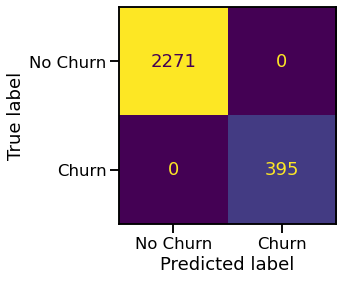

In [288]:
ConfusionMatrixDisplay.from_estimator(XGB_B_Search.best_estimator_,X_train,y_train,colorbar=False,display_labels=['No Churn','Churn'])

In [289]:
test.loc[(test[0]==1) & (test['churn']==1)]

0  churn
89    1    1.0
230   1    1.0
277   1    1.0
307   1    1.0
360   1    1.0
454   1    1.0
542   1    1.0
550   1    1.0
552   1    1.0
558   1    1.0
613   1    1.0
655   1    1.0
730   1    1.0
851   1    1.0
911   1    1.0
914   1    1.0
1204  1    1.0
1337  1    1.0
1516  1    1.0
1551  1    1.0
1694  1    1.0
1845  1    1.0
1851  1    1.0
1869  1    1.0
1934  1    1.0
1939  1    1.0
1950  1    1.0
1977  1    1.0
2076  1    1.0
2107  1    1.0
2139  1    1.0
2158  1    1.0
2215  1    1.0
2237  1    1.0
2258  1    1.0
2335  1    1.0
2377  1    1.0
2407  1    1.0
2567  1    1.0
2575  1    1.0
2591  1    1.0
2614  1    1.0
2645  1    1.0
2647  1    1.0

In [290]:
test.loc[(test[0]==0) & (test['churn']==1)]

0  churn
10    0    1.0
33    0    1.0
41    0    1.0
48    0    1.0
57    0    1.0
...  ..    ...
2624  0    1.0
2629  0    1.0
2660  0    1.0
2662  0    1.0
2664  0    1.0

[258 rows x 2 columns]

In [291]:
individual_shap(10,Processed_X,PRED_COMPARE)

AssertionError: visualize() can only display Explanation objects (or arrays of them)!

### Shapley Conclusions

The international plan also seems to be relevent area. Not having the international plan had a high impact on churn, though the opposite cannot be said for having the international plan -- having the international plan did not have a high impact on churn.

Voicemail messages also showed a negative impact on churn. High voicemail messages had a negative impact on the model - voicemail users impacted the model away from a churn decision.  

## Conclusions

The final model was able to identify the actual Churn customers 81% of the time. 11% of the time the model misidentified non-churn customers as churn customers. This model was tuned to avoid overfitting and memorizing training data, I would expect it to show similar scores with further unseen data. The model used weighting to avoid synthesizing more training data give the unbalanced dataset. 

The Shapley Scores indicate customer service calls are an intuitive cause of churn. Not having an international plan highly contributed to churn predictions in the model. 

Utilizing voicemail had the opposite effect on churn - it had an anti-churn effect. 

### Reccomendations 

Targeting churn customers with discounts, deals, and further customer service attention could help in customer retention. Enticing customers who make international calls with the international plan may also help retain guests 
as customers that did not have the international plan also racked up charges and calls without the plan.

In [ ]:
df.groupby('international plan')['total intl calls'].mean()

In [ ]:
df.groupby('international plan')['total intl charge'].mean()

In [495]:
dfi.export(cross_val_df, 'crossval_df.png')

### Further Modeling

For further modeling I would like to see text message useage, internet usage, and recent phone purchase. It would also be helpful to look at a longer stretch of customer data. Data useage will show how current customers are using their smartphones. 